# Musical Genre Classification with Deep Learning


Dataset for Music Analysis

FMA(Free Music Archive) https://github.com/mdeff/fma

Analysis and processing of 24GB medium dataset

## Audio analysis and processing

In [1]:
import os
import numpy as np
import librosa
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras

In [2]:

# AUDIO_DIR='C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_small/fma_small'
# DATA_DIR='C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_metadata/fma_metadata'

# # LONG_SPECTO = 640 
# # BINS = 128 


# def get_tids_from_directory(audio_dir):
#     tids = []
#     for _, dirnames, files in os.walk(audio_dir):
#         if dirnames == []:
#             tids.extend(int(file[:-4]) for file in files if file !='.DS_Store')
#     return tids


# def get_audio_path(audio_dir, track_id):
#     tid_str = '{:06d}'.format(track_id)
#     return os.path.join(audio_dir, tid_str[:3], tid_str + '.mp3')


In [3]:

AUDIO_DIR='C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_medium/fma_medium'
DATA_DIR='C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_metadata/fma_metadata'

# LONG_SPECTO = 640 
# BINS = 128 



def get_tids_from_directory(audio_dir):
    tids = []
    for _, dirnames, files in os.walk(audio_dir):
        if dirnames == []:
            tids.extend(int(file[:-4]) for file in files if file !='.DS_Store')
    return tids


def get_audio_path(audio_dir, track_id):
    tid_str = '{:06d}'.format(track_id)
    return os.path.join(audio_dir, tid_str[:3], tid_str + '.mp3')


In [4]:
tids = get_tids_from_directory(AUDIO_DIR)
print("Number of tracks: ",len(tids))


Number of tracks:  25000


In [5]:
#filters a list of track IDs based on the size of the corresponding audio files.
#The function only retains tracks that are larger than a specified minimum size


def filter_by_size(tids,min_size=700000):
    tids_correct = []
    count=0
    for file in tids:
        fpath = get_audio_path(AUDIO_DIR, file)
        tam = os.path.getsize(fpath)
        if tam > min_size:
            tids_correct.append(file)
        else:
            print('Track incorrect: ', fpath, " ,  size: ",tam)
            count += 1
    tids_ok = np.array(tids_correct, dtype='int64')
    print('Total tracks incorrect ', count)
    print('Total tracks correct ', tids_ok.size)
    return tids_ok

In [7]:
tracks_correct = filter_by_size(tids)

Track incorrect:  C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_medium/fma_medium\000\000139.mp3  ,  size:  480953
Track incorrect:  C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_medium/fma_medium\000\000140.mp3  ,  size:  480497
Track incorrect:  C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_medium/fma_medium\000\000141.mp3  ,  size:  480945
Track incorrect:  C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_medium/fma_medium\000\000459.mp3  ,  size:  481256
Track incorrect:  C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_medium/fma_medium\000\000512.mp3  ,  size:  601401
Track incorrect:  C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGenero

## Metadata with pandas

In [8]:
filepath = DATA_DIR+'/tracks.csv'
tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])


#Selection of columns from the dataframe
cols = [('set', 'split'),('set', 'subset'),('track', 'genre_top')]

#print(tracks[('set', 'subset')].value_counts())
#filtering the columns
df_medium = tracks[cols]
#print(f"Total tracks before filtering by size: {df_medium.shape[0]}")
df_medium = df_medium[df_medium[('set', 'subset')] == 'medium'] 

#print(f"Total tracks before filtering by size: {df_medium.shape[0]}")
#filter for tracks that exceed a certain size
df_filtered = df_medium[df_medium.index.isin(tracks_correct)]
#print(f"Total tracks after filtering by size: {df_filtered.shape[0]}")

In [9]:
df_filtered.head(10)

set             track
             split  subset genre_top
track_id                            
3         training  medium   Hip-Hop
134       training  medium   Hip-Hop
136       training  medium      Rock
181           test  medium      Rock
198       training  medium      Folk
208       training  medium      Folk
209       training  medium      Folk
237       training  medium      Jazz
247       training  medium      Rock
249       training  medium      Rock

In [10]:
genres = df_filtered[('track', 'genre_top')].unique()

genres

array(['Hip-Hop', 'Rock', 'Folk', 'Jazz', 'Electronic', 'Experimental',
       'Soul-RnB', 'Pop', 'Spoken', 'Country', 'Blues', 'Classical',
       'Instrumental', 'Old-Time / Historic', 'International',
       'Easy Listening'], dtype=object)

In [11]:
dict_genres = {}

for g in range(genres.size):
    print(g)
    print(genres[g])
    dict_genres[genres[g]] = g
    

0
Hip-Hop
1
Rock
2
Folk
3
Jazz
4
Electronic
5
Experimental
6
Soul-RnB
7
Pop
8
Spoken
9
Country
10
Blues
11
Classical
12
Instrumental
13
Old-Time / Historic
14
International
15
Easy Listening


In [12]:
# dict_genres

# least_representative_genres = {"Experimental","Spoken",
#                                  "Soul-RnB","Country",
#                                  "Instrumental","Old-Time / Historic",
#                                  "International","Easy Listening"}

In [13]:
dict_genres_final = {}
cont=0

# for g in dict_genres:
#     if (g not in least_representative_genres):
#         dict_genres_final.update({g:cont})
#         cont+=1

for g in dict_genres:
    dict_genres_final.update({g: cont})
    cont += 1

In [14]:
dict_genres_final

{'Hip-Hop': 0,
 'Rock': 1,
 'Folk': 2,
 'Jazz': 3,
 'Electronic': 4,
 'Experimental': 5,
 'Soul-RnB': 6,
 'Pop': 7,
 'Spoken': 8,
 'Country': 9,
 'Blues': 10,
 'Classical': 11,
 'Instrumental': 12,
 'Old-Time / Historic': 13,
 'International': 14,
 'Easy Listening': 15}

Clarification:

df_filtered has the metadata of all the tracks to process

Then you have to filter by more representative, more differentiable genres.

for example: we filter Instrumental, International because they are not representative enough (International or Instrumental can be any genre); We also removed Spoken, Old because they are quite clear to distinguish.

and the most representative genres would be rock, blues, folk, pop, hip-hop, electronica,

Both jazz and classical music are respectively little and very representative. They are added to analyze their behavior...


In [15]:
df_train = df_filtered[df_filtered[('set', 'split')] == 'training']
df_valid = df_filtered[df_filtered[('set', 'split')] == 'validation']
df_test = df_filtered[df_filtered[('set', 'split')] == 'test']

print(df_train.shape, df_valid.shape, df_test.shape)

df_train.head()




(12114, 3) (1556, 3) (1610, 3)


set             track
             split  subset genre_top
track_id                            
3         training  medium   Hip-Hop
134       training  medium   Hip-Hop
136       training  medium      Rock
198       training  medium      Folk
208       training  medium      Folk

In [16]:
df_train.head(10)

set             track
             split  subset genre_top
track_id                            
3         training  medium   Hip-Hop
134       training  medium   Hip-Hop
136       training  medium      Rock
198       training  medium      Folk
208       training  medium      Folk
209       training  medium      Folk
237       training  medium      Jazz
247       training  medium      Rock
249       training  medium      Rock
257       training  medium      Rock

In [17]:
henrys = []
for k in dict_genres_final: 
    print(k)
    henrys.append(k)

henrys

Hip-Hop
Rock
Folk
Jazz
Electronic
Experimental
Soul-RnB
Pop
Spoken
Country
Blues
Classical
Instrumental
Old-Time / Historic
International
Easy Listening


['Hip-Hop',
 'Rock',
 'Folk',
 'Jazz',
 'Electronic',
 'Experimental',
 'Soul-RnB',
 'Pop',
 'Spoken',
 'Country',
 'Blues',
 'Classical',
 'Instrumental',
 'Old-Time / Historic',
 'International',
 'Easy Listening']

# Preprocessing of the audio

### Librosa

In [17]:
# Function to create spectrograms with librosa
# def create_spectrogram_librosa(track_id):
#     try:
#         filepath = get_audio_path(AUDIO_DIR, track_id)
#         if not os.path.exists(filepath):
#             print(f"Error: Audio file not found at path {filepath}")
#             return None

#         y, sr = librosa.load(filepath, sr=None)
#         spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
#         spect = librosa.power_to_db(spect, ref=np.max)
#         print('Shape of spectrogram:', spect.T.shape)
#         return spect.T
#     except Exception as e:
#         print(f"Error processing track_id {track_id}: {e}")
#         return None

# Spectrogram parameters
WINDOW_DURATION = 0.023  # 23 ms
N_MELS = 64              # 64 mel bands
TIME_FRAMES = 256        # Number of time frames per segment
SEGMENT_DURATION = 3     # 3 seconds per segment
OVERLAP_RATIO = 0.5      # 50% overlap

def create_spectrogram_segment(y, sr):
    n_fft = int(WINDOW_DURATION * sr)
    n_fft = 2 ** int(np.ceil(np.log2(n_fft)))  # Next power of 2
    hop_length = n_fft // 2  # 50% overlap

    # Generate mel spectrogram
    spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft,
                                           hop_length=hop_length, n_mels=N_MELS)
    spect = librosa.power_to_db(spect, ref=np.max)

    # Handle variable-length spectrograms
    num_time_frames = spect.shape[1]
    if num_time_frames < TIME_FRAMES:
        # Pad with zeros
        pad_width = TIME_FRAMES - num_time_frames
        spect = np.pad(spect, ((0, 0), (0, pad_width)), mode='constant')
    else:
        # Truncate to TIME_FRAMES
        spect = spect[:, :TIME_FRAMES]

     # Normalize spectrogram
    mean = np.mean(spect)
    std = np.std(spect)
    spect = (spect - mean) / (std + 1e-6)
    return spect.T  # Shape: (TIME_FRAMES, N_MELS)

# Function to load a 3-second segment from a track
def load_audio_segment(track_id, offset, duration=SEGMENT_DURATION):
    try:
        filepath = get_audio_path(AUDIO_DIR, track_id)
        if not os.path.exists(filepath):
            print(f"Error: Audio file not found at path {filepath}")
            return None, None

        y, sr = librosa.load(filepath, sr=None, offset=offset, duration=duration)
        return y, sr
    except Exception as e:
        print(f"Error processing track_id {track_id}: {e}")
        return None, None

def get_overlapping_segments(track_id, segment_duration=SEGMENT_DURATION, overlap_ratio=0.5):
    filepath = get_audio_path(AUDIO_DIR, track_id)
    if not os.path.exists(filepath):
        print(f"Audio file not found at path {filepath}")
        return []

    y_full, sr = librosa.load(filepath, sr=None)
    total_duration = librosa.get_duration(y=y_full, sr=sr)
    segments = []
    step = segment_duration * (1 - overlap_ratio)
    current_offset = 0

    while current_offset + segment_duration <= total_duration:
        y_segment = y_full[int(current_offset * sr):int((current_offset + segment_duration) * sr)]
        if len(y_segment) < sr * segment_duration:
            # Pad if necessary
            y_segment = np.pad(y_segment, (0, int(sr * segment_duration) - len(y_segment)), mode='constant')
        spect = create_spectrogram_segment(y_segment, sr)
        segments.append(spect)
        current_offset += step

    return segments

# def plot_spect(track_id):
#     filepath = get_audio_path(AUDIO_DIR, track_id)
#     print("File to process:", filepath)
    
#     spect = create_spectrogram_librosa(track_id)
    
#     if spect is None:
#         print(f"Error: Spectrogram for track_id {track_id} is None")
#         return
    
#     print("Spectrogram shape:", spect.shape)
    
#     plt.figure(figsize=(10, 4))
#     librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
#     plt.colorbar(format='%+2.0f dB')
#     plt.show()

# Example with track_id = 3
#plot_spect(3)

### FFMPEG

In [18]:
import subprocess as sp

# def create_spectrogram_ffmpeg(track_id):
#     filepath = get_audio_path(AUDIO_DIR, track_id)

#     command = ['ffmpeg','-i', filepath, '-f', 's16le', '-acodec', 'pcm_s16le', '-ac', '1'] # channels 2 for stereo, 1 for mono
#     command.append('-')
#     # 30s at 44.1 kHz ~= 1.3e6
#     try:
#         proc = sp.run(command, stdout=sp.PIPE, bufsize=10**7, stderr=sp.DEVNULL, check=True)
#         res = np.fromstring(proc.stdout, dtype="int16")
#         print('res of fmpegloader ', res) 
#         return res
#     except sp.CalledProcessError as e:
#         print('FLASHASTE with ',filepath)
#         pass


In [19]:
# def plot_spect(track_id):
#     filepath = get_audio_path(AUDIO_DIR, track_id)
#     print("file to process ",filepath)
    
#     spect = create_spectrogram_librosa(filepath)
#     #spect = create_spectrogram_ffmpeg(filepath)
    
  
#     plt.figure(figsize=(10, 4))
#     librosa.display.specshow(spect.T, y_axis='mel', fmax=8000, x_axis='time')
#     plt.colorbar(format='%+2.0f dB')
#     plt.show()

In [20]:
# example with tid = 2
#plot_spect(5)
# img = np.array(create_spectrogram_ffmpeg(5))
#img.reshape(BINS, LONG_SPECTO)
#print('img',img.shape)

In [21]:
import numpy as np
#import cv2
from matplotlib import pyplot as plt




# GENERATOR


MMF – Memory Mapped Files
Unlike the generator that inherits from Sequential, the following script applies parallelism limited by virtual memory.

In [22]:

#list_gen = list(dict_genres.values()) # for all the genres
list_gen = list(dict_genres_final.values()) 
np_gen = np.array(list_gen)
CANT_genres = np_gen.shape[0]
CANT_genres


8

In [23]:
## this cell is to filter the metadata by more representative genres
## if not executed, it is classified according to the 16 genres
## filter by most representative genres


df_true = df_filtered[df_filtered[('track', 'genre_top')].isin(henrys)]

# in this case, I execute it to filter by the genres, in my opinion, most representative

df_train = df_true[df_true[('set', 'split')] == 'training']
df_valid = df_true[df_true[('set', 'split')] == 'validation']
df_test = df_true[df_true[('set', 'split')] == 'test']

print(df_train.shape, df_valid.shape, df_test.shape)

df_train.head()
# Access the genre column correctly using the MultiIndex
train_genre_distribution = df_train[('track', 'genre_top')].value_counts()
print("Training Set Genre Distribution:")
print(train_genre_distribution)

# Validation set
valid_genre_distribution = df_valid[('track', 'genre_top')].value_counts()
print("\nValidation Set Genre Distribution:")
print(valid_genre_distribution)

# Test set
test_genre_distribution = df_test[('track', 'genre_top')].value_counts()
print("\nTesting Set Genre Distribution:")
print(test_genre_distribution)

(5809, 3) (671, 3) (765, 3)
Training Set Genre Distribution:
(track, genre_top)
Electronic       759
Instrumental     756
Experimental     728
Pop              723
International    718
Hip-Hop          711
Rock             709
Folk             705
Name: count, dtype: int64

Validation Set Genre Distribution:
(track, genre_top)
Folk             95
Experimental     94
International    93
Electronic       92
Hip-Hop          85
Instrumental     84
Rock             79
Pop              49
Name: count, dtype: int64

Testing Set Genre Distribution:
(track, genre_top)
Folk             99
Pop              99
Instrumental     98
Rock             97
International    97
Experimental     97
Hip-Hop          96
Electronic       82
Name: count, dtype: int64


In [24]:
from tensorflow.keras import utils


In [25]:
from tqdm import tqdm

# creating the numpy arrays in a memory mapped file

# base_path = "C:/Users/HASSAN/Desktop"
# x_train_path = os.path.join(base_path, 'x_train_medium.dat')
# y_train_path = os.path.join(base_path, 'y_train_medium.dat')
# x_valid_path = os.path.join(base_path, 'x_valid_medium.dat')
# y_valid_path = os.path.join(base_path, 'y_valid_medium.dat')
# x_test_path = os.path.join(base_path, 'x_test_medium.dat')
# y_test_path = os.path.join(base_path, 'y_test_medium.dat')

# npData_x_train = np.memmap(x_train_path, dtype='float32', mode='w+', shape=(len(df_train), LONG_SPECTO, BINS))
# npData_y_train = np.memmap(y_train_path, dtype='float32', mode='w+', shape=(len(df_train), CANT_genres))

# npData_x_valid = np.memmap(x_valid_path, dtype='float32', mode='w+', shape=(len(df_valid), LONG_SPECTO, BINS))
# npData_y_valid = np.memmap(y_valid_path, dtype='float32', mode='w+', shape=(len(df_valid), CANT_genres))

# npData_x_test = np.memmap(x_test_path, dtype='float32', mode='w+', shape=(len(df_test), LONG_SPECTO, BINS))
# npData_y_test = np.memmap(y_test_path, dtype='float32', mode='w+', shape=(len(df_test), CANT_genres))



# for i, track_id in tqdm(enumerate(df_train.index), total=len(df_train)): 
#     npData_x_train[i, :, :] = create_spectrogram_librosa(track_id)[:LONG_SPECTO, :]
#     genre = df_train[('track','genre_top')].loc[track_id]
#     y_categ = keras.utils.to_categorical(dict_genres_final.get(genre), CANT_genres)
#     npData_y_train[i,:] = y_categ


# print("\n Training data generated correctly \n\n")
    
    
# for i, track_id in tqdm(enumerate(df_valid.index), total=len(df_valid)): 
#     npData_x_valid[i, :, :] = create_spectrogram_librosa(track_id)[:LONG_SPECTO, :]
#     genre = df_valid[('track','genre_top')].loc[track_id]
#     y_categ = keras.utils.to_categorical(dict_genres_final.get(genre), CANT_genres)
#     npData_y_valid[i,:] = y_categ

    
# print("\n Validation data generated correctly \n\n")


# for i, track_id in tqdm(enumerate(df_test.index), total=len(df_test)): 
#     npData_x_test[i, :, :] = create_spectrogram_librosa(track_id)[:LONG_SPECTO, :]
#     genre = df_test[('track','genre_top')].loc[track_id]
#     y_categ = keras.utils.to_categorical(dict_genres_final.get(genre), CANT_genres)
#     npData_y_test[i,:] = y_categ

    
# print("\n Testing data generated correctly \n\n")


# del npData_x_train
# del npData_y_train
# del npData_x_valid
# del npData_y_valid
# del npData_x_test
# del npData_y_test
# Paths for memory-mapped arrays
import random
# Paths for memory-mapped arrays
base_path = "C:/Users/HASSAN/Desktop"
x_train_path = os.path.join(base_path, 'x_train_medium.dat')
y_train_path = os.path.join(base_path, 'y_train_medium.dat')
x_valid_path = os.path.join(base_path, 'x_valid_medium.dat')
y_valid_path = os.path.join(base_path, 'y_valid_medium.dat')

# Parameters
SEGMENTS_PER_TRACK = 20
# TIME_FRAMES = 256
# N_MELS = 64
#CANT_genres = 16
#SEGMENT_DURATION = 3  # duration of each segment in seconds

# Calculate estimated total number of training and validation samples
num_train_samples = len(df_train) * SEGMENTS_PER_TRACK
num_valid_samples = len(df_valid)

# Create memory-mapped arrays with estimated sizes
npData_x_train = np.memmap(x_train_path, dtype='float32', mode='w+', shape=(num_train_samples, TIME_FRAMES, N_MELS))
npData_y_train = np.memmap(y_train_path, dtype='float32', mode='w+', shape=(num_train_samples, CANT_genres))

npData_x_valid = np.memmap(x_valid_path, dtype='float32', mode='w+', shape=(num_valid_samples, TIME_FRAMES, N_MELS))
npData_y_valid = np.memmap(y_valid_path, dtype='float32', mode='w+', shape=(num_valid_samples, CANT_genres))

# Function to load and process a 3-second segment
def load_and_process_segment(track_id, offset):
    y_segment, sr = load_audio_segment(track_id, offset)
    if y_segment is None:
        return None
    spect = create_spectrogram_segment(y_segment, sr)
    return spect

# Generate training data
train_sample_index = 0

# for track_id in tqdm(df_train.index, desc='Processing training tracks'):
#     filepath = get_audio_path(AUDIO_DIR, track_id)
#     if not os.path.exists(filepath):
#         print(f"Audio file not found at path {filepath}")
#         continue

#     # Load full track to determine duration
#     y_full, sr = librosa.load(filepath, sr=None)
#     total_duration = librosa.get_duration(y=y_full, sr=sr)

#     for _ in range(SEGMENTS_PER_TRACK):
#         max_offset = total_duration - SEGMENT_DURATION
#         if max_offset <= 0:
#             offset = 0
#         else:
#             offset = random.uniform(0, max_offset)

#         # Load and process segment
#         spect = load_and_process_segment(track_id, offset)
#         if spect is None:
#             continue

#         # Store valid segment in memory-mapped array
#         npData_x_train[train_sample_index, :, :] = spect

#         # Get label and store it
#         genre = df_train[('track', 'genre_top')].loc[track_id]
#         y_categ = keras.utils.to_categorical(dict_genres_final.get(genre), CANT_genres)
#         npData_y_train[train_sample_index, :] = y_categ

#         train_sample_index += 1

# # Record actual number of valid training samples
# actual_num_train_samples = train_sample_index

for track_id in tqdm(df_train.index, desc='Processing training tracks'):
    segments = get_overlapping_segments(track_id, segment_duration=SEGMENT_DURATION, overlap_ratio=0.5)
    
    if not segments:
        print(f"No segments generated for track {track_id}")
        continue

    # Iterate over the generated overlapping segments
    for spect in segments:
        if train_sample_index >= num_train_samples:
            break  # Stop if we've reached the total number of training samples

        # Store valid segment in memory-mapped array
        npData_x_train[train_sample_index, :, :] = spect

        # Get label and store it
        genre = df_train[('track', 'genre_top')].loc[track_id]
        y_categ = keras.utils.to_categorical(dict_genres_final.get(genre), CANT_genres)
        npData_y_train[train_sample_index, :] = y_categ

        train_sample_index += 1

# Record the actual number of valid training samples
actual_num_train_samples = train_sample_index
print(f"\nTraining data generated correctly with {actual_num_train_samples} samples\n")

# Repeat the process for validation data
valid_sample_index = 0

for track_id in tqdm(df_valid.index, desc='Processing validation tracks'):
    spect = load_and_process_segment(track_id, offset=15)  # Offset can be any fixed value for validation
    if spect is None:
        continue

    # Store valid segment in memory-mapped array
    npData_x_valid[valid_sample_index, :, :] = spect

    # Get label and store it
    genre = df_valid[('track', 'genre_top')].loc[track_id]
    y_categ = keras.utils.to_categorical(dict_genres_final.get(genre), CANT_genres)
    npData_y_valid[valid_sample_index, :] = y_categ

    valid_sample_index += 1

# Record actual number of valid validation samples
actual_num_valid_samples = valid_sample_index
print(f"\nValidation data generated correctly with {actual_num_valid_samples} samples\n")

# Clean up memory-mapped arrays for initial files
del npData_x_train
del npData_y_train
del npData_x_valid
del npData_y_valid

# Paths for corrected memory-mapped files
corrected_x_train_path = os.path.join(base_path, 'x_train_medium_corrected.dat')
corrected_y_train_path = os.path.join(base_path, 'y_train_medium_corrected.dat')
corrected_x_valid_path = os.path.join(base_path, 'x_valid_medium_corrected.dat')
corrected_y_valid_path = os.path.join(base_path, 'y_valid_medium_corrected.dat')

# Create new memory-mapped arrays with the actual number of samples
corrected_npData_x_train = np.memmap(corrected_x_train_path, dtype='float32', mode='w+',
                                     shape=(actual_num_train_samples, TIME_FRAMES, N_MELS))
corrected_npData_y_train = np.memmap(corrected_y_train_path, dtype='float32', mode='w+',
                                     shape=(actual_num_train_samples, CANT_genres))

corrected_npData_x_valid = np.memmap(corrected_x_valid_path, dtype='float32', mode='w+',
                                     shape=(actual_num_valid_samples, TIME_FRAMES, N_MELS))
corrected_npData_y_valid = np.memmap(corrected_y_valid_path, dtype='float32', mode='w+',
                                     shape=(actual_num_valid_samples, CANT_genres))

# Load initial memory-mapped arrays again
npData_x_train = np.memmap(x_train_path, dtype='float32', mode='r',
                           shape=(num_train_samples, TIME_FRAMES, N_MELS))
npData_y_train = np.memmap(y_train_path, dtype='float32', mode='r',
                           shape=(num_train_samples, CANT_genres))

npData_x_valid = np.memmap(x_valid_path, dtype='float32', mode='r',
                           shape=(num_valid_samples, TIME_FRAMES, N_MELS))
npData_y_valid = np.memmap(y_valid_path, dtype='float32', mode='r',
                           shape=(num_valid_samples, CANT_genres))

# Copy only the valid data into the corrected arrays
corrected_npData_x_train[:] = npData_x_train[:actual_num_train_samples]
corrected_npData_y_train[:] = npData_y_train[:actual_num_train_samples]

corrected_npData_x_valid[:] = npData_x_valid[:actual_num_valid_samples]
corrected_npData_y_valid[:] = npData_y_valid[:actual_num_valid_samples]

# Flush to save data
corrected_npData_x_train.flush()
corrected_npData_y_train.flush()
corrected_npData_x_valid.flush()
corrected_npData_y_valid.flush()

# Clean up initial memory-mapped arrays
del npData_x_train, npData_y_train, npData_x_valid, npData_y_valid
del corrected_npData_x_train, corrected_npData_y_train, corrected_npData_x_valid, corrected_npData_y_valid



Processing training tracks: 100%|██████████████████████████████████████████████████| 5809/5809 [11:52<00:00,  8.16it/s]



Training data generated correctly with 106950 samples



Processing validation tracks: 100%|██████████████████████████████████████████████████| 671/671 [00:08<00:00, 78.17it/s]



Validation data generated correctly with 671 samples



# MODEL

In [26]:


import keras
import tensorflow as tf

from keras.layers import Activation, Bidirectional, Input, Dense, concatenate, Conv1D, Conv2D
from keras.layers import GRU, Lambda, MaxPooling1D, MaxPooling2D, LSTM, Flatten, Reshape, Dropout, BatchNormalization
from keras.models import Sequential, Model

from keras import regularizers
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau


from keras.optimizers import Adam, RMSprop

import multiprocessing as mp

In [27]:
##CNN without recurrent neural Network

In [28]:
# # Load preprocessed dataset
# base_path = "C:/Users/HASSAN/Desktop"
# x_train_path = os.path.join(base_path, 'x_train_medium.dat')
# y_train_path = os.path.join(base_path, 'y_train_medium.dat')
# x_valid_path = os.path.join(base_path, 'x_valid_medium.dat')
# y_valid_path = os.path.join(base_path, 'y_valid_medium.dat')
# x_test_path = os.path.join(base_path, 'x_test_medium.dat')
# y_test_path = os.path.join(base_path, 'y_test_medium.dat')

# x_train = np.memmap(x_train_path, dtype='float32', mode='r', shape=(len(df_train), LONG_SPECTO, BINS))  
# y_train = np.memmap(y_train_path, dtype='float32', mode='r', shape=(len(df_train), CANT_genres))  

# x_valid = np.memmap(x_valid_path, dtype='float32', mode='r', shape=(len(df_valid), LONG_SPECTO, BINS))  
# y_valid = np.memmap(y_valid_path, dtype='float32', mode='r', shape=(len(df_valid), CANT_genres))  

# x_test = np.memmap(x_test_path, dtype='float32', mode='r', shape=(len(df_test), LONG_SPECTO, BINS))
# y_test = np.memmap(y_test_path, dtype='float32', mode='r', shape=(len(df_test), CANT_genres))

# # Parallelism limited by virtual memory
# import functools
# top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)
# top3_acc.__name__ = 'top3_acc'





BATCH_SIZE = 32
Model_Name = "CNN_medium"
EPOCHS_CNN = 25
#SEGMENTS_PER_TRACK=30
# from keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Dropout, Flatten, Dense
# from keras import Model, regularizers
# import keras.backend as K
# K.clear_session()

# i = Input(shape=(LONG_SPECTO, BINS,))

# # Convolutional layers
# c1 = Conv1D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.005))(i)
# b1 = BatchNormalization(momentum=0.9)(c1)
# p1 = MaxPooling1D(2)(b1)
# d1 = Dropout(0.5)(p1)

# c2 = Conv1D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.005))(d1)
# b2 = BatchNormalization(momentum=0.9)(c2)
# p2 = MaxPooling1D(2)(b2)
# d2 = Dropout(0.5)(p2)

# c3 = Conv1D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.005))(d2)
# b3 = BatchNormalization(momentum=0.9)(c3)
# p3 = MaxPooling1D(2)(b3)
# d3 = Dropout(0.5)(p3)

# # Flatten and dense layers
# f = Flatten()(d3)
# d = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.005))(f)
# d4 = Dropout(0.5)(d)

# out = Dense(CANT_genres, activation='softmax')(d4)

# model = Model(inputs=i, outputs=out)

# model.summary()

# from keras.optimizers import Adam
# from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# opt = Adam(learning_rate=0.0001)

# model.compile(loss='categorical_crossentropy',
#               optimizer=opt,
#               metrics=['accuracy', top3_acc])

# model.summary()

# checkpoint_callback = ModelCheckpoint('./best_weight_'+Model_Name+'_CNN64_'+str(EPOCHS_CNN)+'epochs.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# reducelr_callback = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01)

# callbacks = [checkpoint_callback, reducelr_callback]

# h = model.fit(x_train, y_train, batch_size=BATCH_SIZE, 
#               epochs=EPOCHS_CNN, verbose=1, validation_data=(x_valid, y_valid), 
#               shuffle=True,
#               callbacks=callbacks)

# model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)

# # Summarize history for accuracy
# plt.plot(h.history['accuracy'])
# plt.plot(h.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.savefig(Model_Name+'_CNN64_acc-val_acc_'+str(EPOCHS_CNN)+'epochs.jpg')
# plt.show()

# # Summarize history for loss
# plt.plot(h.history['loss'])
# plt.plot(h.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.savefig(Model_Name+'_CNN64_loss-val_loss_'+str(EPOCHS_CNN)+'epochs.jpg')
# plt.show()

# Load preprocessed dataset
base_path = "C:/Users/HASSAN/Desktop"
# Load corrected preprocessed dataset
corrected_x_train_path = os.path.join(base_path, 'x_train_medium_corrected.dat')
corrected_y_train_path = os.path.join(base_path, 'y_train_medium_corrected.dat')
corrected_x_valid_path = os.path.join(base_path, 'x_valid_medium_corrected.dat')
corrected_y_valid_path = os.path.join(base_path, 'y_valid_medium_corrected.dat')

# # # # Define the constants for data shape and dtype
# TIME_FRAMES = 256
# N_MELS = 64
# dtype = 'float32'  # or whatever dtype is used in your memmap

# # Calculate the number of bytes per sample
# bytes_per_sample = np.dtype(dtype).itemsize * TIME_FRAMES * N_MELS

# # Get the file size and calculate the number of samples
# file_size = os.path.getsize(corrected_x_train_path)
# actual_num_train_samples = file_size // bytes_per_sample

# # Get the file size and calculate the number of samples
# file_size2 = os.path.getsize(corrected_x_valid_path)
# actual_num_valid_samples = file_size2 // bytes_per_sample



num_train_samples = actual_num_train_samples
num_valid_samples = actual_num_valid_samples

# Shape: (num_samples, time_frames, n_mels)
x_train = np.memmap(corrected_x_train_path, dtype='float32', mode='r', shape=(actual_num_train_samples, TIME_FRAMES, N_MELS))
y_train = np.memmap(corrected_y_train_path, dtype='float32', mode='r', shape=(actual_num_train_samples, CANT_genres))

x_valid = np.memmap(corrected_x_valid_path, dtype='float32', mode='r', shape=(actual_num_valid_samples, TIME_FRAMES, N_MELS))
y_valid = np.memmap(corrected_y_valid_path, dtype='float32', mode='r', shape=(actual_num_valid_samples, CANT_genres))

# Convert one-hot encoded labels to class indices
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

y_train_labels = np.argmax(y_train[:actual_num_train_samples], axis=1)


# Compute class weights
class_labels = np.unique(y_train_labels)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_labels),
    y=y_train_labels
)
class_weights_dict = dict(zip(np.unique(y_train_labels), class_weights))


print("Computed class weights:")
for label, weight in class_weights_dict.items():
    print(f"Class {label}: Weight {weight}")

# No need to reshape the data for 1D convolutions (no channel dimension)
# Input shape for 1D Conv: (time_steps, features)
input_shape = (TIME_FRAMES, N_MELS)  # (256, 64)


from keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization
from keras import Model, regularizers
import keras.backend as K
K.clear_session()

# Model definition for 1D CNN
i = Input(shape=input_shape)

# First Convolutional Layer
c1 = Conv1D(filters=32, kernel_size=3, activation='relu',
            kernel_regularizer=regularizers.l2(0.0001))(i)
b1 = BatchNormalization(momentum=0.9)(c1)
p1 = MaxPooling1D(pool_size=2)(b1)
d1 = Dropout(0.4)(p1)

# # Second Convolutional Layer
c2 = Conv1D(filters=32, kernel_size=5, activation='relu',
            kernel_regularizer=regularizers.l2(0.0001))(d1)
b2 = BatchNormalization(momentum=0.9)(c2)
p2 = MaxPooling1D(pool_size=2)(b2)
d2 = Dropout(0.5)(p2)

# third Convolutional Layer
c2a = Conv1D(filters=32, kernel_size=5, activation='relu',
            kernel_regularizer=regularizers.l2(0.0001))(d2)
b2a = BatchNormalization(momentum=0.9)(c2a)
p2a = MaxPooling1D(pool_size=2)(b2a)
d2a = Dropout(0.4)(p2a)

# Fourth Convolutional Layer
c3 = Conv1D(filters=32, kernel_size=3, activation='relu',
            kernel_regularizer=regularizers.l2(0.0001))(d2a)
b3 = BatchNormalization(momentum=0.9)(c3)
p3 = MaxPooling1D(pool_size=2)(b3)
d3 = Dropout(0.5)(p3)
# # Fourth Convolutional Layer
# c4 = Conv1D(filters=32, kernel_size=3, activation='relu',
#             kernel_regularizer=regularizers.l2(0.0001))(d3)
# b4 = BatchNormalization(momentum=0.9)(c4)
# p4 = MaxPooling1D(pool_size=2)(b4)
# d4 = Dropout(0.2)(p4)

# Flatten and Dense Layers
f = Flatten()(d3)
d4 = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(f)
d5 = Dropout(0.4)(d4)

# Output Layer
out = Dense(CANT_genres, activation='softmax')(d5)

model = Model(inputs=i, outputs=out)

# Summary of the model
model.summary()

# Compile the model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

opt = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Callbacks
checkpoint_callback = ModelCheckpoint('./best_weight_'+Model_Name+'_CNN1D_'+str(EPOCHS_CNN)+'epochs.keras',
                                      monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

reducelr_callback = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_delta=0.01)

callbacks = [checkpoint_callback, reducelr_callback]

# Training the model with class weights
h = model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS_CNN,
    verbose=1,
    validation_data=(x_valid, y_valid),
    shuffle=True,
    callbacks=callbacks
)


Computed class weights:
Class 0: Weight 1.0221538343910086
Class 1: Weight 1.003433911281243
Class 2: Weight 0.9978913189520042
Class 3: Weight 1.0239545036764706
Class 4: Weight 1.0293155220203265
Class 5: Weight 1.0102584447970981
Class 6: Weight 0.9560032894736842
Class 7: Weight 0.9624730021598272



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 254, 32)             │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 127, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 123, 32)             │           5,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 123, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 61, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 61, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 57, 32)              │           5,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 57, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 28, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 26, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 26, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 13, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 13, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 416)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          13,344 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 33,704 (131.66 KB)

 Trainable params: 33,448 (130.66 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/25
3341/3343 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2285 - loss: 2.0906
Epoch 1: val_accuracy improved from -inf to 0.36662, saving model to ./best_weight_CNN_medium_CNN1D_25epochs.keras
3343/3343 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.2286 - loss: 2.0905 - val_accuracy: 0.3666 - val_loss: 1.8140 - learning_rate: 0.0010
Epoch 2/25
3342/3343 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3536 - loss: 1.7612
Epoch 2: val_accuracy improved from 0.36662 to 0.40387, saving model to ./best_weight_CNN_medium_CNN1D_25epochs.keras
3343/3343 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.3536 - loss: 1.7612 - val_accuracy: 0.4039 - val_loss: 1.7648 - learning_rate: 0.0010
Epoch 3/25
3339/3343 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3982 - loss: 1.6769
Epoch 3: val_accuracy improved from 0.40387 to 0.41878, saving model to ./best_weight_CNN_medium_CNN1D_25epochs.keras
3343/3343 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.3982 - loss: 1.6769 - val_accuracy: 0.4

Processing test tracks:   0%|                                                                  | 0/765 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Processing test tracks:   0%|                                                          | 1/765 [00:00<05:22,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Processing test tracks:   0%|▏                                                         | 2/765 [00:00<05:13,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:   0%|▏                                                         | 3/765 [00:01<03:51,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   1%|▎                                                         | 4/765 [00:01<03:17,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Processing test tracks:   1%|▍                                                         | 5/765 [00:01<03:06,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:   1%|▍                                                         | 6/765 [00:01<02:58,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:   1%|▌                                                         | 7/765 [00:01<02:49,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   1%|▌                                                         | 8/765 [00:02<02:40,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   1%|▋                                                         | 9/765 [00:02<02:36,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:   1%|▋                                                        | 10/765 [00:02<02:30,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test tracks:   1%|▊                                                        | 11/765 [00:02<02:30,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   2%|▉                                                        | 12/765 [00:02<02:31,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:   2%|▉                                                        | 13/765 [00:02<02:26,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   2%|█                                                        | 14/765 [00:03<02:26,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:   2%|█                                                        | 15/765 [00:03<02:28,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:   2%|█▏                                                       | 16/765 [00:03<02:26,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   2%|█▎                                                       | 17/765 [00:03<02:23,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   2%|█▎                                                       | 18/765 [00:03<02:21,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:   2%|█▍                                                       | 19/765 [00:04<02:19,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test tracks:   3%|█▍                                                       | 20/765 [00:04<02:21,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test tracks:   3%|█▌                                                       | 21/765 [00:04<02:20,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:   3%|█▋                                                       | 22/765 [00:04<02:24,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:   3%|█▋                                                       | 23/765 [00:04<02:26,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   3%|█▊                                                       | 24/765 [00:05<02:22,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:   3%|█▊                                                       | 25/765 [00:05<02:26,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:   3%|█▉                                                       | 26/765 [00:05<02:24,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   4%|██                                                       | 27/765 [00:05<02:20,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test tracks:   4%|██                                                       | 28/765 [00:05<02:23,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:   4%|██▏                                                      | 29/765 [00:06<02:19,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:   4%|██▏                                                      | 30/765 [00:06<02:21,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:   4%|██▎                                                      | 31/765 [00:06<02:21,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:   4%|██▍                                                      | 32/765 [00:06<02:20,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:   4%|██▍                                                      | 33/765 [00:06<02:20,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   4%|██▌                                                      | 34/765 [00:07<02:17,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:   5%|██▌                                                      | 35/765 [00:07<02:18,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:   5%|██▋                                                      | 36/765 [00:07<02:17,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:   5%|██▊                                                      | 37/765 [00:07<02:20,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   5%|██▊                                                      | 38/765 [00:07<02:19,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:   5%|██▉                                                      | 39/765 [00:07<02:16,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:   5%|██▉                                                      | 40/765 [00:08<02:19,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:   5%|███                                                      | 41/765 [00:08<02:21,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   5%|███▏                                                     | 42/765 [00:08<02:23,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   6%|███▏                                                     | 43/765 [00:08<02:20,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:   6%|███▎                                                     | 44/765 [00:08<02:21,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:   6%|███▎                                                     | 45/765 [00:09<02:19,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:   6%|███▍                                                     | 46/765 [00:09<02:14,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:   6%|███▌                                                     | 47/765 [00:09<02:14,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   6%|███▌                                                     | 48/765 [00:09<02:14,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:   6%|███▋                                                     | 49/765 [00:09<02:16,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   7%|███▋                                                     | 50/765 [00:10<02:13,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:   7%|███▊                                                     | 51/765 [00:10<02:12,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:   7%|███▊                                                     | 52/765 [00:10<02:11,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:   7%|███▉                                                     | 53/765 [00:10<02:11,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   7%|████                                                     | 54/765 [00:10<02:14,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   7%|████                                                     | 55/765 [00:11<02:14,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:   7%|████▏                                                    | 56/765 [00:11<02:14,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   7%|████▏                                                    | 57/765 [00:11<02:13,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:   8%|████▎                                                    | 58/765 [00:11<02:11,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:   8%|████▍                                                    | 59/765 [00:11<02:11,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:   8%|████▍                                                    | 60/765 [00:11<02:11,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:   8%|████▌                                                    | 61/765 [00:12<02:15,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:   8%|████▌                                                    | 62/765 [00:12<02:15,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   8%|████▋                                                    | 63/765 [00:12<02:13,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:   8%|████▊                                                    | 64/765 [00:12<02:16,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:   8%|████▊                                                    | 65/765 [00:12<02:13,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:   9%|████▉                                                    | 66/765 [00:13<02:13,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:   9%|████▉                                                    | 67/765 [00:13<02:10,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   9%|█████                                                    | 68/765 [00:13<02:09,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:   9%|█████▏                                                   | 69/765 [00:13<02:08,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:   9%|█████▏                                                   | 70/765 [00:13<02:06,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:   9%|█████▎                                                   | 71/765 [00:14<02:08,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:   9%|█████▎                                                   | 72/765 [00:14<02:08,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  10%|█████▍                                                   | 73/765 [00:14<02:13,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  10%|█████▌                                                   | 74/765 [00:14<02:12,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test tracks:  10%|█████▌                                                   | 75/765 [00:14<02:10,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test tracks:  10%|█████▋                                                   | 76/765 [00:14<02:15,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  10%|█████▋                                                   | 77/765 [00:15<02:11,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  10%|█████▊                                                   | 78/765 [00:15<02:11,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  10%|█████▉                                                   | 79/765 [00:15<02:09,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  10%|█████▉                                                   | 80/765 [00:15<02:08,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  11%|██████                                                   | 81/765 [00:15<02:07,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  11%|██████                                                   | 82/765 [00:16<02:09,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  11%|██████▏                                                  | 83/765 [00:16<02:11,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  11%|██████▎                                                  | 84/765 [00:16<02:11,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  11%|██████▎                                                  | 85/765 [00:16<02:10,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test tracks:  11%|██████▍                                                  | 86/765 [00:16<02:14,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  11%|██████▍                                                  | 87/765 [00:17<02:15,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  12%|██████▌                                                  | 88/765 [00:17<02:21,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  12%|██████▋                                                  | 89/765 [00:17<02:18,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  12%|██████▋                                                  | 90/765 [00:17<02:16,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  12%|██████▊                                                  | 91/765 [00:17<02:17,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  12%|██████▊                                                  | 92/765 [00:18<02:13,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  12%|██████▉                                                  | 93/765 [00:18<02:09,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  12%|███████                                                  | 94/765 [00:18<02:08,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  12%|███████                                                  | 95/765 [00:18<02:08,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  13%|███████▏                                                 | 96/765 [00:18<02:06,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  13%|███████▏                                                 | 97/765 [00:19<02:03,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  13%|███████▎                                                 | 98/765 [00:19<02:02,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  13%|███████▍                                                 | 99/765 [00:19<02:08,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  13%|███████▎                                                | 100/765 [00:19<02:11,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  13%|███████▍                                                | 101/765 [00:19<02:08,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  13%|███████▍                                                | 102/765 [00:20<02:09,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  13%|███████▌                                                | 103/765 [00:20<02:10,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  14%|███████▌                                                | 104/765 [00:20<02:09,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  14%|███████▋                                                | 105/765 [00:20<02:06,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  14%|███████▊                                                | 106/765 [00:20<02:04,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  14%|███████▊                                                | 107/765 [00:20<02:05,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  14%|███████▉                                                | 108/765 [00:21<02:02,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  14%|███████▉                                                | 109/765 [00:21<02:07,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  14%|████████                                                | 110/765 [00:21<02:05,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  15%|████████▏                                               | 111/765 [00:21<02:04,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  15%|████████▏                                               | 112/765 [00:21<02:02,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test tracks:  15%|████████▎                                               | 113/765 [00:22<01:58,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  15%|████████▎                                               | 114/765 [00:22<01:58,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  15%|████████▍                                               | 115/765 [00:22<01:59,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  15%|████████▍                                               | 116/765 [00:22<02:02,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  15%|████████▌                                               | 117/765 [00:22<02:10,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  15%|████████▋                                               | 118/765 [00:23<02:13,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  16%|████████▋                                               | 119/765 [00:23<02:13,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  16%|████████▊                                               | 120/765 [00:23<02:11,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  16%|████████▊                                               | 121/765 [00:23<02:10,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  16%|████████▉                                               | 122/765 [00:23<02:07,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  16%|█████████                                               | 123/765 [00:24<02:10,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  16%|█████████                                               | 124/765 [00:24<02:10,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  16%|█████████▏                                              | 125/765 [00:24<02:07,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  16%|█████████▏                                              | 126/765 [00:24<02:06,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  17%|█████████▎                                              | 127/765 [00:24<02:04,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  17%|█████████▎                                              | 128/765 [00:25<02:05,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  17%|█████████▍                                              | 129/765 [00:25<02:03,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  17%|█████████▌                                              | 130/765 [00:25<02:02,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  17%|█████████▌                                              | 131/765 [00:25<02:02,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  17%|█████████▋                                              | 132/765 [00:25<02:01,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  17%|█████████▋                                              | 133/765 [00:26<01:57,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  18%|█████████▊                                              | 134/765 [00:26<01:58,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  18%|█████████▉                                              | 135/765 [00:26<01:56,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  18%|█████████▉                                              | 136/765 [00:26<01:58,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  18%|██████████                                              | 137/765 [00:26<01:56,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  18%|██████████                                              | 138/765 [00:26<01:56,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  18%|██████████▏                                             | 139/765 [00:27<01:58,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  18%|██████████▏                                             | 140/765 [00:27<01:56,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  18%|██████████▎                                             | 141/765 [00:27<02:02,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  19%|██████████▍                                             | 142/765 [00:27<02:01,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  19%|██████████▍                                             | 143/765 [00:27<02:02,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  19%|██████████▌                                             | 144/765 [00:28<02:01,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  19%|██████████▌                                             | 145/765 [00:28<02:00,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  19%|██████████▋                                             | 146/765 [00:28<02:04,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  19%|██████████▊                                             | 147/765 [00:28<02:00,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  19%|██████████▊                                             | 148/765 [00:28<01:58,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  19%|██████████▉                                             | 149/765 [00:29<01:58,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  20%|██████████▉                                             | 150/765 [00:29<01:58,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  20%|███████████                                             | 151/765 [00:29<01:56,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  20%|███████████▏                                            | 152/765 [00:29<01:54,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  20%|███████████▏                                            | 153/765 [00:29<01:51,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  20%|███████████▎                                            | 154/765 [00:30<01:51,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  20%|███████████▎                                            | 155/765 [00:30<01:51,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  20%|███████████▍                                            | 156/765 [00:30<01:52,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  21%|███████████▍                                            | 157/765 [00:30<01:50,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  21%|███████████▌                                            | 158/765 [00:30<01:51,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  21%|███████████▋                                            | 159/765 [00:30<01:50,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  21%|███████████▋                                            | 160/765 [00:31<01:52,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  21%|███████████▊                                            | 161/765 [00:31<01:54,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  21%|███████████▊                                            | 162/765 [00:31<01:53,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  21%|███████████▉                                            | 163/765 [00:31<01:52,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  21%|████████████                                            | 164/765 [00:31<01:54,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  22%|████████████                                            | 165/765 [00:32<01:57,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  22%|████████████▏                                           | 166/765 [00:32<01:56,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  22%|████████████▏                                           | 167/765 [00:32<01:53,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test tracks:  22%|████████████▎                                           | 168/765 [00:32<01:52,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  22%|████████████▎                                           | 169/765 [00:32<01:50,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  22%|████████████▍                                           | 170/765 [00:33<01:49,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  22%|████████████▌                                           | 171/765 [00:33<01:48,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  22%|████████████▌                                           | 172/765 [00:33<01:52,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test tracks:  23%|████████████▋                                           | 173/765 [00:33<01:53,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  23%|████████████▋                                           | 174/765 [00:33<01:53,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  23%|████████████▊                                           | 175/765 [00:34<01:58,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  23%|████████████▉                                           | 176/765 [00:34<01:56,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  23%|████████████▉                                           | 177/765 [00:34<01:55,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  23%|█████████████                                           | 178/765 [00:34<01:53,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  23%|█████████████                                           | 179/765 [00:34<01:55,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  24%|█████████████▏                                          | 180/765 [00:34<01:53,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  24%|█████████████▏                                          | 181/765 [00:35<01:52,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  24%|█████████████▎                                          | 182/765 [00:35<01:50,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  24%|█████████████▍                                          | 183/765 [00:35<01:51,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  24%|█████████████▍                                          | 184/765 [00:35<01:51,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  24%|█████████████▌                                          | 185/765 [00:35<01:49,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  24%|█████████████▌                                          | 186/765 [00:36<01:50,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  24%|█████████████▋                                          | 187/765 [00:36<01:50,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  25%|█████████████▊                                          | 188/765 [00:36<01:50,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  25%|█████████████▊                                          | 189/765 [00:36<01:52,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  25%|█████████████▉                                          | 190/765 [00:36<01:50,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  25%|█████████████▉                                          | 191/765 [00:37<01:49,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  25%|██████████████                                          | 192/765 [00:37<01:50,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  25%|██████████████▏                                         | 193/765 [00:37<01:51,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  25%|██████████████▏                                         | 194/765 [00:37<01:49,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  25%|██████████████▎                                         | 195/765 [00:37<01:49,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  26%|██████████████▎                                         | 196/765 [00:38<01:49,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  26%|██████████████▍                                         | 197/765 [00:38<01:48,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  26%|██████████████▍                                         | 198/765 [00:38<01:47,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  26%|██████████████▌                                         | 199/765 [00:38<01:50,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  26%|██████████████▋                                         | 200/765 [00:38<01:51,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  26%|██████████████▋                                         | 201/765 [00:39<01:50,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  26%|██████████████▊                                         | 202/765 [00:39<01:49,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  27%|██████████████▊                                         | 203/765 [00:39<01:47,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test tracks:  27%|██████████████▉                                         | 204/765 [00:39<02:27,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  27%|███████████████                                         | 205/765 [00:40<02:12,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  27%|███████████████                                         | 206/765 [00:40<02:02,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  27%|███████████████▏                                        | 207/765 [00:40<01:55,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  27%|███████████████▏                                        | 208/765 [00:40<01:51,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  27%|███████████████▎                                        | 209/765 [00:40<01:48,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  27%|███████████████▎                                        | 210/765 [00:40<01:46,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  28%|███████████████▍                                        | 211/765 [00:41<01:46,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  28%|███████████████▌                                        | 212/765 [00:41<01:45,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  28%|███████████████▌                                        | 213/765 [00:41<01:52,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  28%|███████████████▋                                        | 214/765 [00:41<01:49,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  28%|███████████████▋                                        | 215/765 [00:41<01:45,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  28%|███████████████▊                                        | 216/765 [00:42<01:42,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  28%|███████████████▉                                        | 217/765 [00:42<01:41,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  28%|███████████████▉                                        | 218/765 [00:42<01:39,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  29%|████████████████                                        | 219/765 [00:42<01:41,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  29%|████████████████                                        | 220/765 [00:42<01:44,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  29%|████████████████▏                                       | 221/765 [00:43<01:43,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  29%|████████████████▎                                       | 222/765 [00:43<01:45,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  29%|████████████████▎                                       | 223/765 [00:43<01:43,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  29%|████████████████▍                                       | 224/765 [00:43<01:42,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  29%|████████████████▍                                       | 225/765 [00:43<01:43,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  30%|████████████████▌                                       | 226/765 [00:43<01:41,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  30%|████████████████▌                                       | 227/765 [00:44<01:44,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  30%|████████████████▋                                       | 228/765 [00:44<01:43,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  30%|████████████████▊                                       | 229/765 [00:44<01:40,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  30%|████████████████▊                                       | 230/765 [00:44<01:40,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  30%|████████████████▉                                       | 231/765 [00:44<01:43,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  30%|████████████████▉                                       | 232/765 [00:45<01:41,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  30%|█████████████████                                       | 233/765 [00:45<01:40,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  31%|█████████████████▏                                      | 234/765 [00:45<01:38,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  31%|█████████████████▏                                      | 235/765 [00:45<01:38,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  31%|█████████████████▎                                      | 236/765 [00:45<01:38,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  31%|█████████████████▎                                      | 237/765 [00:46<01:36,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  31%|█████████████████▍                                      | 238/765 [00:46<01:37,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  31%|█████████████████▍                                      | 239/765 [00:46<01:35,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  31%|█████████████████▌                                      | 240/765 [00:46<01:36,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  32%|█████████████████▋                                      | 241/765 [00:46<01:37,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  32%|█████████████████▋                                      | 242/765 [00:46<01:36,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  32%|█████████████████▊                                      | 243/765 [00:47<01:37,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  32%|█████████████████▊                                      | 244/765 [00:47<01:38,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  32%|█████████████████▉                                      | 245/765 [00:47<01:39,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  32%|██████████████████                                      | 246/765 [00:47<01:36,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  32%|██████████████████                                      | 247/765 [00:47<01:41,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  32%|██████████████████▏                                     | 248/765 [00:48<01:42,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  33%|██████████████████▏                                     | 249/765 [00:48<01:43,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  33%|██████████████████▎                                     | 250/765 [00:48<01:42,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  33%|██████████████████▎                                     | 251/765 [00:48<01:41,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  33%|██████████████████▍                                     | 252/765 [00:48<01:40,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  33%|██████████████████▌                                     | 253/765 [00:49<01:37,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  33%|██████████████████▌                                     | 254/765 [00:49<01:35,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  33%|██████████████████▋                                     | 255/765 [00:49<01:38,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  33%|██████████████████▋                                     | 256/765 [00:49<01:37,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  34%|██████████████████▊                                     | 257/765 [00:49<01:36,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  34%|██████████████████▉                                     | 258/765 [00:50<01:34,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  34%|██████████████████▉                                     | 259/765 [00:50<01:33,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  34%|███████████████████                                     | 260/765 [00:50<01:35,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  34%|███████████████████                                     | 261/765 [00:50<01:34,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  34%|███████████████████▏                                    | 262/765 [00:50<01:35,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  34%|███████████████████▎                                    | 263/765 [00:50<01:34,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  35%|███████████████████▎                                    | 264/765 [00:51<01:33,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  35%|███████████████████▍                                    | 265/765 [00:51<01:34,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  35%|███████████████████▍                                    | 266/765 [00:51<01:33,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  35%|███████████████████▌                                    | 267/765 [00:51<01:33,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  35%|███████████████████▌                                    | 268/765 [00:51<01:32,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  35%|███████████████████▋                                    | 269/765 [00:52<01:36,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  35%|███████████████████▊                                    | 270/765 [00:52<01:34,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test tracks:  35%|███████████████████▊                                    | 271/765 [00:52<01:37,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  36%|███████████████████▉                                    | 272/765 [00:52<01:34,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  36%|███████████████████▉                                    | 273/765 [00:52<01:33,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  36%|████████████████████                                    | 274/765 [00:53<01:34,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  36%|████████████████████▏                                   | 275/765 [00:53<01:31,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  36%|████████████████████▏                                   | 276/765 [00:53<01:28,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  36%|████████████████████▎                                   | 277/765 [00:53<01:28,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  36%|████████████████████▎                                   | 278/765 [00:53<01:30,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Processing test tracks:  36%|████████████████████▍                                   | 279/765 [00:54<01:35,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  37%|████████████████████▍                                   | 280/765 [00:54<01:36,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  37%|████████████████████▌                                   | 281/765 [00:54<01:36,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test tracks:  37%|████████████████████▋                                   | 282/765 [00:54<01:39,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


Processing test tracks:  37%|████████████████████▋                                   | 283/765 [00:54<01:42,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test tracks:  37%|████████████████████▊                                   | 284/765 [00:55<01:40,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  37%|████████████████████▊                                   | 285/765 [00:55<01:41,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  37%|████████████████████▉                                   | 286/765 [00:55<01:43,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  38%|█████████████████████                                   | 287/765 [00:55<01:47,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  38%|█████████████████████                                   | 288/765 [00:56<01:49,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test tracks:  38%|█████████████████████▏                                  | 289/765 [00:56<01:46,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  38%|█████████████████████▏                                  | 290/765 [00:56<01:47,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  38%|█████████████████████▎                                  | 291/765 [00:56<01:42,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  38%|█████████████████████▍                                  | 292/765 [00:56<01:38,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  38%|█████████████████████▍                                  | 293/765 [00:57<01:34,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  38%|█████████████████████▌                                  | 294/765 [00:57<01:30,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  39%|█████████████████████▌                                  | 295/765 [00:57<01:29,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  39%|█████████████████████▋                                  | 296/765 [00:57<01:30,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  39%|█████████████████████▋                                  | 297/765 [00:57<01:29,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  39%|█████████████████████▊                                  | 298/765 [00:57<01:26,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  39%|█████████████████████▉                                  | 299/765 [00:58<01:26,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  39%|█████████████████████▉                                  | 300/765 [00:58<01:26,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  39%|██████████████████████                                  | 301/765 [00:58<01:27,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  39%|██████████████████████                                  | 302/765 [00:58<01:27,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  40%|██████████████████████▏                                 | 303/765 [00:58<01:27,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  40%|██████████████████████▎                                 | 304/765 [00:59<01:26,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  40%|██████████████████████▎                                 | 305/765 [00:59<01:27,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test tracks:  40%|██████████████████████▍                                 | 306/765 [00:59<01:26,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  40%|██████████████████████▍                                 | 307/765 [00:59<01:24,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  40%|██████████████████████▌                                 | 308/765 [00:59<01:25,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  40%|██████████████████████▌                                 | 309/765 [00:59<01:24,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  41%|██████████████████████▋                                 | 310/765 [01:00<01:23,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  41%|██████████████████████▊                                 | 311/765 [01:00<01:28,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  41%|██████████████████████▊                                 | 312/765 [01:00<01:27,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  41%|██████████████████████▉                                 | 313/765 [01:00<01:24,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  41%|██████████████████████▉                                 | 314/765 [01:00<01:23,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  41%|███████████████████████                                 | 315/765 [01:01<01:23,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  41%|███████████████████████▏                                | 316/765 [01:01<01:23,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  41%|███████████████████████▏                                | 317/765 [01:01<01:27,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  42%|███████████████████████▎                                | 318/765 [01:01<01:25,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  42%|███████████████████████▎                                | 319/765 [01:01<01:28,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  42%|███████████████████████▍                                | 320/765 [01:02<01:25,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  42%|███████████████████████▍                                | 321/765 [01:02<01:24,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  42%|███████████████████████▌                                | 322/765 [01:02<01:24,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  42%|███████████████████████▋                                | 323/765 [01:02<01:23,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  42%|███████████████████████▋                                | 324/765 [01:02<01:22,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  42%|███████████████████████▊                                | 325/765 [01:03<01:25,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  43%|███████████████████████▊                                | 326/765 [01:03<01:26,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  43%|███████████████████████▉                                | 327/765 [01:03<01:24,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  43%|████████████████████████                                | 328/765 [01:03<01:24,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  43%|████████████████████████                                | 329/765 [01:03<01:23,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  43%|████████████████████████▏                               | 330/765 [01:04<01:21,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  43%|████████████████████████▏                               | 331/765 [01:04<01:18,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  43%|████████████████████████▎                               | 332/765 [01:04<01:19,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  44%|████████████████████████▍                               | 333/765 [01:04<01:20,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  44%|████████████████████████▍                               | 334/765 [01:04<01:19,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  44%|████████████████████████▌                               | 335/765 [01:04<01:20,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  44%|████████████████████████▌                               | 336/765 [01:05<01:23,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Processing test tracks:  44%|████████████████████████▋                               | 337/765 [01:05<01:23,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  44%|████████████████████████▋                               | 338/765 [01:05<01:20,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  44%|████████████████████████▊                               | 339/765 [01:05<01:20,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  44%|████████████████████████▉                               | 340/765 [01:05<01:19,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  45%|████████████████████████▉                               | 341/765 [01:06<01:19,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  45%|█████████████████████████                               | 342/765 [01:06<01:18,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  45%|█████████████████████████                               | 343/765 [01:06<01:18,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  45%|█████████████████████████▏                              | 344/765 [01:06<01:20,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  45%|█████████████████████████▎                              | 345/765 [01:06<01:23,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  45%|█████████████████████████▎                              | 346/765 [01:07<01:20,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  45%|█████████████████████████▍                              | 347/765 [01:07<01:23,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  45%|█████████████████████████▍                              | 348/765 [01:07<01:21,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  46%|█████████████████████████▌                              | 349/765 [01:07<01:20,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  46%|█████████████████████████▌                              | 350/765 [01:07<01:19,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  46%|█████████████████████████▋                              | 351/765 [01:08<01:19,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  46%|█████████████████████████▊                              | 352/765 [01:08<01:21,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  46%|█████████████████████████▊                              | 353/765 [01:08<01:20,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  46%|█████████████████████████▉                              | 354/765 [01:08<01:23,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  46%|█████████████████████████▉                              | 355/765 [01:08<01:21,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  47%|██████████████████████████                              | 356/765 [01:08<01:18,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  47%|██████████████████████████▏                             | 357/765 [01:09<01:17,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  47%|██████████████████████████▏                             | 358/765 [01:09<01:15,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  47%|██████████████████████████▎                             | 359/765 [01:09<01:15,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  47%|██████████████████████████▎                             | 360/765 [01:09<01:14,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  47%|██████████████████████████▍                             | 361/765 [01:09<01:14,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  47%|██████████████████████████▍                             | 362/765 [01:10<01:14,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  47%|██████████████████████████▌                             | 363/765 [01:10<01:15,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  48%|██████████████████████████▋                             | 364/765 [01:10<01:17,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  48%|██████████████████████████▋                             | 365/765 [01:10<01:16,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  48%|██████████████████████████▊                             | 366/765 [01:10<01:15,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  48%|██████████████████████████▊                             | 367/765 [01:11<01:13,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  48%|██████████████████████████▉                             | 368/765 [01:11<01:13,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  48%|███████████████████████████                             | 369/765 [01:11<01:12,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  48%|███████████████████████████                             | 370/765 [01:11<01:12,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  48%|███████████████████████████▏                            | 371/765 [01:11<01:13,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  49%|███████████████████████████▏                            | 372/765 [01:11<01:13,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  49%|███████████████████████████▎                            | 373/765 [01:12<01:13,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  49%|███████████████████████████▍                            | 374/765 [01:12<01:12,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  49%|███████████████████████████▍                            | 375/765 [01:12<01:11,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  49%|███████████████████████████▌                            | 376/765 [01:12<01:10,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  49%|███████████████████████████▌                            | 377/765 [01:12<01:14,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  49%|███████████████████████████▋                            | 378/765 [01:13<01:13,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  50%|███████████████████████████▋                            | 379/765 [01:13<01:13,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  50%|███████████████████████████▊                            | 380/765 [01:13<01:12,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  50%|███████████████████████████▉                            | 381/765 [01:13<01:11,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  50%|███████████████████████████▉                            | 382/765 [01:13<01:10,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  50%|████████████████████████████                            | 383/765 [01:14<01:09,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  50%|████████████████████████████                            | 384/765 [01:14<01:09,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  50%|████████████████████████████▏                           | 385/765 [01:14<01:11,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  50%|████████████████████████████▎                           | 386/765 [01:14<01:15,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  51%|████████████████████████████▎                           | 387/765 [01:14<01:13,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  51%|████████████████████████████▍                           | 388/765 [01:14<01:12,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  51%|████████████████████████████▍                           | 389/765 [01:15<01:11,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  51%|████████████████████████████▌                           | 390/765 [01:15<01:11,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  51%|████████████████████████████▌                           | 391/765 [01:15<01:10,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  51%|████████████████████████████▋                           | 392/765 [01:15<01:10,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  51%|████████████████████████████▊                           | 393/765 [01:15<01:08,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  52%|████████████████████████████▊                           | 394/765 [01:16<01:07,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  52%|████████████████████████████▉                           | 395/765 [01:16<01:12,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  52%|████████████████████████████▉                           | 396/765 [01:16<01:13,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  52%|█████████████████████████████                           | 397/765 [01:16<01:11,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  52%|█████████████████████████████▏                          | 398/765 [01:16<01:12,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  52%|█████████████████████████████▏                          | 399/765 [01:17<01:11,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  52%|█████████████████████████████▎                          | 400/765 [01:17<01:10,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  52%|█████████████████████████████▎                          | 401/765 [01:17<01:11,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  53%|█████████████████████████████▍                          | 402/765 [01:17<01:10,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  53%|█████████████████████████████▌                          | 403/765 [01:17<01:10,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  53%|█████████████████████████████▌                          | 404/765 [01:18<01:11,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  53%|█████████████████████████████▋                          | 405/765 [01:18<01:09,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  53%|█████████████████████████████▋                          | 406/765 [01:18<01:09,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  53%|█████████████████████████████▊                          | 407/765 [01:18<01:10,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  53%|█████████████████████████████▊                          | 408/765 [01:18<01:09,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  53%|█████████████████████████████▉                          | 409/765 [01:19<01:09,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  54%|██████████████████████████████                          | 410/765 [01:19<01:08,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  54%|██████████████████████████████                          | 411/765 [01:19<01:08,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  54%|██████████████████████████████▏                         | 412/765 [01:19<01:09,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  54%|██████████████████████████████▏                         | 413/765 [01:19<01:07,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  54%|██████████████████████████████▎                         | 414/765 [01:19<01:06,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  54%|██████████████████████████████▍                         | 415/765 [01:20<01:07,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  54%|██████████████████████████████▍                         | 416/765 [01:20<01:07,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test tracks:  55%|██████████████████████████████▌                         | 417/765 [01:20<01:06,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  55%|██████████████████████████████▌                         | 418/765 [01:20<01:07,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  55%|██████████████████████████████▋                         | 419/765 [01:20<01:05,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  55%|██████████████████████████████▋                         | 420/765 [01:21<01:08,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  55%|██████████████████████████████▊                         | 421/765 [01:21<01:06,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  55%|██████████████████████████████▉                         | 422/765 [01:21<01:05,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  55%|██████████████████████████████▉                         | 423/765 [01:21<01:04,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  55%|███████████████████████████████                         | 424/765 [01:21<01:07,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  56%|███████████████████████████████                         | 425/765 [01:22<01:06,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  56%|███████████████████████████████▏                        | 426/765 [01:22<01:04,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  56%|███████████████████████████████▎                        | 427/765 [01:22<01:03,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  56%|███████████████████████████████▎                        | 428/765 [01:22<01:05,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  56%|███████████████████████████████▍                        | 429/765 [01:22<01:04,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  56%|███████████████████████████████▍                        | 430/765 [01:23<01:05,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  56%|███████████████████████████████▌                        | 431/765 [01:23<01:04,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test tracks:  56%|███████████████████████████████▌                        | 432/765 [01:23<01:03,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  57%|███████████████████████████████▋                        | 433/765 [01:23<01:04,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  57%|███████████████████████████████▊                        | 434/765 [01:23<01:03,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  57%|███████████████████████████████▊                        | 435/765 [01:24<01:03,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  57%|███████████████████████████████▉                        | 436/765 [01:24<01:01,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  57%|███████████████████████████████▉                        | 437/765 [01:24<01:01,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  57%|████████████████████████████████                        | 438/765 [01:24<00:57,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  57%|████████████████████████████████▏                       | 439/765 [01:24<00:58,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  58%|████████████████████████████████▏                       | 440/765 [01:24<00:59,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  58%|████████████████████████████████▎                       | 441/765 [01:25<01:01,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  58%|████████████████████████████████▎                       | 442/765 [01:25<01:00,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  58%|████████████████████████████████▍                       | 443/765 [01:25<01:02,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  58%|████████████████████████████████▌                       | 444/765 [01:25<01:00,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  58%|████████████████████████████████▌                       | 445/765 [01:25<00:59,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  58%|████████████████████████████████▋                       | 446/765 [01:26<00:59,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  58%|████████████████████████████████▋                       | 447/765 [01:26<01:00,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  59%|████████████████████████████████▊                       | 448/765 [01:26<01:01,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  59%|████████████████████████████████▊                       | 449/765 [01:26<01:01,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  59%|████████████████████████████████▉                       | 450/765 [01:26<01:01,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  59%|█████████████████████████████████                       | 451/765 [01:27<01:02,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  59%|█████████████████████████████████                       | 452/765 [01:27<01:05,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  59%|█████████████████████████████████▏                      | 453/765 [01:27<01:08,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  59%|█████████████████████████████████▏                      | 454/765 [01:27<01:05,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test tracks:  59%|█████████████████████████████████▎                      | 455/765 [01:27<01:07,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  60%|█████████████████████████████████▍                      | 456/765 [01:28<01:05,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  60%|█████████████████████████████████▍                      | 457/765 [01:28<01:05,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  60%|█████████████████████████████████▌                      | 458/765 [01:28<01:03,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  60%|█████████████████████████████████▌                      | 459/765 [01:28<01:02,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  60%|█████████████████████████████████▋                      | 460/765 [01:28<01:01,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  60%|█████████████████████████████████▋                      | 461/765 [01:29<01:01,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  60%|█████████████████████████████████▊                      | 462/765 [01:29<01:00,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  61%|█████████████████████████████████▉                      | 463/765 [01:29<01:00,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  61%|█████████████████████████████████▉                      | 464/765 [01:29<01:00,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  61%|██████████████████████████████████                      | 465/765 [01:29<01:00,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  61%|██████████████████████████████████                      | 466/765 [01:30<00:58,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  61%|██████████████████████████████████▏                     | 467/765 [01:30<00:56,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  61%|██████████████████████████████████▎                     | 468/765 [01:30<00:56,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  61%|██████████████████████████████████▎                     | 469/765 [01:30<00:56,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  61%|██████████████████████████████████▍                     | 470/765 [01:30<00:55,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  62%|██████████████████████████████████▍                     | 471/765 [01:31<00:55,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  62%|██████████████████████████████████▌                     | 472/765 [01:31<00:57,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  62%|██████████████████████████████████▌                     | 473/765 [01:31<00:57,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  62%|██████████████████████████████████▋                     | 474/765 [01:31<00:56,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  62%|██████████████████████████████████▊                     | 475/765 [01:31<00:55,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  62%|██████████████████████████████████▊                     | 476/765 [01:32<00:56,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  62%|██████████████████████████████████▉                     | 477/765 [01:32<00:56,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  62%|██████████████████████████████████▉                     | 478/765 [01:32<00:56,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  63%|███████████████████████████████████                     | 479/765 [01:32<00:56,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  63%|███████████████████████████████████▏                    | 480/765 [01:32<00:55,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  63%|███████████████████████████████████▏                    | 481/765 [01:33<00:55,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  63%|███████████████████████████████████▎                    | 482/765 [01:33<00:56,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  63%|███████████████████████████████████▎                    | 483/765 [01:33<00:54,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  63%|███████████████████████████████████▍                    | 484/765 [01:33<00:53,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  63%|███████████████████████████████████▌                    | 485/765 [01:33<00:54,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  64%|███████████████████████████████████▌                    | 486/765 [01:34<00:55,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  64%|███████████████████████████████████▋                    | 487/765 [01:34<00:54,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  64%|███████████████████████████████████▋                    | 488/765 [01:34<00:52,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  64%|███████████████████████████████████▊                    | 489/765 [01:34<00:52,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  64%|███████████████████████████████████▊                    | 490/765 [01:34<00:52,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  64%|███████████████████████████████████▉                    | 491/765 [01:34<00:51,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  64%|████████████████████████████████████                    | 492/765 [01:35<00:51,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  64%|████████████████████████████████████                    | 493/765 [01:35<00:53,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  65%|████████████████████████████████████▏                   | 494/765 [01:35<00:52,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  65%|████████████████████████████████████▏                   | 495/765 [01:35<00:52,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  65%|████████████████████████████████████▎                   | 496/765 [01:35<00:51,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  65%|████████████████████████████████████▍                   | 497/765 [01:36<00:51,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  65%|████████████████████████████████████▍                   | 498/765 [01:36<00:51,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  65%|████████████████████████████████████▌                   | 499/765 [01:36<00:51,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  65%|████████████████████████████████████▌                   | 500/765 [01:36<00:52,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  65%|████████████████████████████████████▋                   | 501/765 [01:36<00:53,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  66%|████████████████████████████████████▋                   | 502/765 [01:37<00:52,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  66%|████████████████████████████████████▊                   | 503/765 [01:37<00:51,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  66%|████████████████████████████████████▉                   | 504/765 [01:37<00:50,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  66%|████████████████████████████████████▉                   | 505/765 [01:37<00:51,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  66%|█████████████████████████████████████                   | 506/765 [01:37<00:50,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  66%|█████████████████████████████████████                   | 507/765 [01:38<00:51,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  66%|█████████████████████████████████████▏                  | 508/765 [01:38<00:50,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  67%|█████████████████████████████████████▎                  | 509/765 [01:38<00:49,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  67%|█████████████████████████████████████▎                  | 510/765 [01:38<00:48,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  67%|█████████████████████████████████████▍                  | 511/765 [01:38<00:48,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  67%|█████████████████████████████████████▍                  | 512/765 [01:39<00:49,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  67%|█████████████████████████████████████▌                  | 513/765 [01:39<00:48,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  67%|█████████████████████████████████████▋                  | 514/765 [01:39<00:49,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  67%|█████████████████████████████████████▋                  | 515/765 [01:39<00:49,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  67%|█████████████████████████████████████▊                  | 516/765 [01:39<00:48,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  68%|█████████████████████████████████████▊                  | 517/765 [01:40<00:48,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  68%|█████████████████████████████████████▉                  | 518/765 [01:40<00:49,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  68%|█████████████████████████████████████▉                  | 519/765 [01:40<00:48,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  68%|██████████████████████████████████████                  | 520/765 [01:40<00:47,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test tracks:  68%|██████████████████████████████████████▏                 | 521/765 [01:40<00:46,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  68%|██████████████████████████████████████▏                 | 522/765 [01:41<00:46,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  68%|██████████████████████████████████████▎                 | 523/765 [01:41<00:45,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  68%|██████████████████████████████████████▎                 | 524/765 [01:41<00:45,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  69%|██████████████████████████████████████▍                 | 525/765 [01:41<00:48,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  69%|██████████████████████████████████████▌                 | 526/765 [01:41<00:46,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  69%|██████████████████████████████████████▌                 | 527/765 [01:41<00:45,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  69%|██████████████████████████████████████▋                 | 528/765 [01:42<00:44,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  69%|██████████████████████████████████████▋                 | 529/765 [01:42<00:44,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  69%|██████████████████████████████████████▊                 | 530/765 [01:42<00:43,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  69%|██████████████████████████████████████▊                 | 531/765 [01:42<00:44,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  70%|██████████████████████████████████████▉                 | 532/765 [01:42<00:44,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  70%|███████████████████████████████████████                 | 533/765 [01:43<00:43,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  70%|███████████████████████████████████████                 | 534/765 [01:43<00:45,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  70%|███████████████████████████████████████▏                | 535/765 [01:43<00:44,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  70%|███████████████████████████████████████▏                | 536/765 [01:43<00:43,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  70%|███████████████████████████████████████▎                | 537/765 [01:43<00:42,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  70%|███████████████████████████████████████▍                | 538/765 [01:44<00:42,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  70%|███████████████████████████████████████▍                | 539/765 [01:44<00:42,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  71%|███████████████████████████████████████▌                | 540/765 [01:44<00:42,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  71%|███████████████████████████████████████▌                | 541/765 [01:44<00:43,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  71%|███████████████████████████████████████▋                | 542/765 [01:44<00:42,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  71%|███████████████████████████████████████▋                | 543/765 [01:45<00:42,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  71%|███████████████████████████████████████▊                | 544/765 [01:45<00:43,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  71%|███████████████████████████████████████▉                | 545/765 [01:45<00:42,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  71%|███████████████████████████████████████▉                | 546/765 [01:45<00:41,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  72%|████████████████████████████████████████                | 547/765 [01:45<00:40,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  72%|████████████████████████████████████████                | 548/765 [01:46<00:41,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  72%|████████████████████████████████████████▏               | 549/765 [01:46<00:40,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  72%|████████████████████████████████████████▎               | 550/765 [01:46<00:39,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  72%|████████████████████████████████████████▎               | 551/765 [01:46<00:40,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  72%|████████████████████████████████████████▍               | 552/765 [01:46<00:39,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  72%|████████████████████████████████████████▍               | 553/765 [01:46<00:38,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  72%|████████████████████████████████████████▌               | 554/765 [01:47<00:37,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  73%|████████████████████████████████████████▋               | 555/765 [01:47<00:37,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  73%|████████████████████████████████████████▋               | 556/765 [01:47<00:38,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  73%|████████████████████████████████████████▊               | 557/765 [01:47<00:38,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  73%|████████████████████████████████████████▊               | 558/765 [01:47<00:37,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  73%|████████████████████████████████████████▉               | 559/765 [01:48<00:37,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  73%|████████████████████████████████████████▉               | 560/765 [01:48<00:38,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  73%|█████████████████████████████████████████               | 561/765 [01:48<00:39,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  73%|█████████████████████████████████████████▏              | 562/765 [01:48<00:41,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  74%|█████████████████████████████████████████▏              | 563/765 [01:48<00:40,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  74%|█████████████████████████████████████████▎              | 564/765 [01:49<00:39,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  74%|█████████████████████████████████████████▎              | 565/765 [01:49<00:38,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  74%|█████████████████████████████████████████▍              | 566/765 [01:49<00:38,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  74%|█████████████████████████████████████████▌              | 567/765 [01:49<00:37,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  74%|█████████████████████████████████████████▌              | 568/765 [01:49<00:36,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  74%|█████████████████████████████████████████▋              | 569/765 [01:49<00:36,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  75%|█████████████████████████████████████████▋              | 570/765 [01:50<00:36,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  75%|█████████████████████████████████████████▊              | 571/765 [01:50<00:36,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  75%|█████████████████████████████████████████▊              | 572/765 [01:50<00:36,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  75%|█████████████████████████████████████████▉              | 573/765 [01:50<00:36,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  75%|██████████████████████████████████████████              | 574/765 [01:50<00:35,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  75%|██████████████████████████████████████████              | 575/765 [01:51<00:35,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  75%|██████████████████████████████████████████▏             | 576/765 [01:51<00:35,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  75%|██████████████████████████████████████████▏             | 577/765 [01:51<00:34,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  76%|██████████████████████████████████████████▎             | 578/765 [01:51<00:34,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  76%|██████████████████████████████████████████▍             | 579/765 [01:51<00:34,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  76%|██████████████████████████████████████████▍             | 580/765 [01:52<00:35,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  76%|██████████████████████████████████████████▌             | 581/765 [01:52<00:34,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  76%|██████████████████████████████████████████▌             | 582/765 [01:52<00:33,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  76%|██████████████████████████████████████████▋             | 583/765 [01:52<00:33,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  76%|██████████████████████████████████████████▊             | 584/765 [01:52<00:32,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  76%|██████████████████████████████████████████▊             | 585/765 [01:52<00:33,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  77%|██████████████████████████████████████████▉             | 586/765 [01:53<00:32,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  77%|██████████████████████████████████████████▉             | 587/765 [01:53<00:32,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  77%|███████████████████████████████████████████             | 588/765 [01:53<00:32,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  77%|███████████████████████████████████████████             | 589/765 [01:53<00:32,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  77%|███████████████████████████████████████████▏            | 590/765 [01:53<00:32,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  77%|███████████████████████████████████████████▎            | 591/765 [01:54<00:32,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  77%|███████████████████████████████████████████▎            | 592/765 [01:54<00:32,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  78%|███████████████████████████████████████████▍            | 593/765 [01:54<00:32,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  78%|███████████████████████████████████████████▍            | 594/765 [01:54<00:32,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  78%|███████████████████████████████████████████▌            | 595/765 [01:54<00:30,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  78%|███████████████████████████████████████████▋            | 596/765 [01:54<00:29,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  78%|███████████████████████████████████████████▋            | 597/765 [01:55<00:31,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  78%|███████████████████████████████████████████▊            | 598/765 [01:55<00:30,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  78%|███████████████████████████████████████████▊            | 599/765 [01:55<00:30,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  78%|███████████████████████████████████████████▉            | 600/765 [01:55<00:30,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  79%|███████████████████████████████████████████▉            | 601/765 [01:55<00:29,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  79%|████████████████████████████████████████████            | 602/765 [01:56<00:30,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  79%|████████████████████████████████████████████▏           | 603/765 [01:56<00:30,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  79%|████████████████████████████████████████████▏           | 604/765 [01:56<00:30,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  79%|████████████████████████████████████████████▎           | 605/765 [01:56<00:29,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  79%|████████████████████████████████████████████▎           | 606/765 [01:56<00:29,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  79%|████████████████████████████████████████████▍           | 607/765 [01:57<00:30,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  79%|████████████████████████████████████████████▌           | 608/765 [01:57<00:29,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  80%|████████████████████████████████████████████▌           | 609/765 [01:57<00:29,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  80%|████████████████████████████████████████████▋           | 610/765 [01:57<00:28,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  80%|████████████████████████████████████████████▋           | 611/765 [01:57<00:28,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  80%|████████████████████████████████████████████▊           | 612/765 [01:57<00:27,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  80%|████████████████████████████████████████████▊           | 613/765 [01:58<00:28,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  80%|████████████████████████████████████████████▉           | 614/765 [01:58<00:30,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test tracks:  80%|█████████████████████████████████████████████           | 615/765 [01:58<00:31,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  81%|█████████████████████████████████████████████           | 616/765 [01:58<00:30,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test tracks:  81%|█████████████████████████████████████████████▏          | 617/765 [01:58<00:30,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  81%|█████████████████████████████████████████████▏          | 618/765 [01:59<00:30,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  81%|█████████████████████████████████████████████▎          | 619/765 [01:59<00:30,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  81%|█████████████████████████████████████████████▍          | 620/765 [01:59<00:30,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test tracks:  81%|█████████████████████████████████████████████▍          | 621/765 [01:59<00:30,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  81%|█████████████████████████████████████████████▌          | 622/765 [02:00<00:29,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  81%|█████████████████████████████████████████████▌          | 623/765 [02:00<00:28,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  82%|█████████████████████████████████████████████▋          | 624/765 [02:00<00:27,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  82%|█████████████████████████████████████████████▊          | 625/765 [02:00<00:26,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  82%|█████████████████████████████████████████████▊          | 626/765 [02:00<00:26,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  82%|█████████████████████████████████████████████▉          | 627/765 [02:00<00:26,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  82%|█████████████████████████████████████████████▉          | 628/765 [02:01<00:25,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  82%|██████████████████████████████████████████████          | 629/765 [02:01<00:25,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  82%|██████████████████████████████████████████████          | 630/765 [02:01<00:26,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  82%|██████████████████████████████████████████████▏         | 631/765 [02:01<00:26,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  83%|██████████████████████████████████████████████▎         | 632/765 [02:01<00:25,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  83%|██████████████████████████████████████████████▎         | 633/765 [02:02<00:25,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  83%|██████████████████████████████████████████████▍         | 634/765 [02:02<00:24,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  83%|██████████████████████████████████████████████▍         | 635/765 [02:02<00:24,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  83%|██████████████████████████████████████████████▌         | 636/765 [02:02<00:23,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  83%|██████████████████████████████████████████████▋         | 637/765 [02:02<00:23,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  83%|██████████████████████████████████████████████▋         | 638/765 [02:03<00:23,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  84%|██████████████████████████████████████████████▊         | 639/765 [02:03<00:23,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  84%|██████████████████████████████████████████████▊         | 640/765 [02:03<00:22,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  84%|██████████████████████████████████████████████▉         | 641/765 [02:03<00:22,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  84%|██████████████████████████████████████████████▉         | 642/765 [02:03<00:23,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  84%|███████████████████████████████████████████████         | 643/765 [02:03<00:23,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  84%|███████████████████████████████████████████████▏        | 644/765 [02:04<00:23,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  84%|███████████████████████████████████████████████▏        | 645/765 [02:04<00:22,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  84%|███████████████████████████████████████████████▎        | 646/765 [02:04<00:22,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  85%|███████████████████████████████████████████████▎        | 647/765 [02:04<00:23,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  85%|███████████████████████████████████████████████▍        | 648/765 [02:04<00:23,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  85%|███████████████████████████████████████████████▌        | 649/765 [02:05<00:22,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  85%|███████████████████████████████████████████████▌        | 650/765 [02:05<00:21,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  85%|███████████████████████████████████████████████▋        | 651/765 [02:05<00:21,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  85%|███████████████████████████████████████████████▋        | 652/765 [02:05<00:21,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  85%|███████████████████████████████████████████████▊        | 653/765 [02:05<00:21,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  85%|███████████████████████████████████████████████▊        | 654/765 [02:06<00:21,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  86%|███████████████████████████████████████████████▉        | 655/765 [02:06<00:21,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  86%|████████████████████████████████████████████████        | 656/765 [02:06<00:21,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  86%|████████████████████████████████████████████████        | 657/765 [02:06<00:20,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  86%|████████████████████████████████████████████████▏       | 658/765 [02:06<00:20,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  86%|████████████████████████████████████████████████▏       | 659/765 [02:07<00:20,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  86%|████████████████████████████████████████████████▎       | 660/765 [02:07<00:19,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Processing test tracks:  86%|████████████████████████████████████████████████▍       | 661/765 [02:07<00:19,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  87%|████████████████████████████████████████████████▍       | 662/765 [02:07<00:19,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  87%|████████████████████████████████████████████████▌       | 663/765 [02:07<00:19,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  87%|████████████████████████████████████████████████▌       | 664/765 [02:07<00:19,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  87%|████████████████████████████████████████████████▋       | 665/765 [02:08<00:19,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  87%|████████████████████████████████████████████████▊       | 666/765 [02:08<00:19,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  87%|████████████████████████████████████████████████▊       | 667/765 [02:08<00:19,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  87%|████████████████████████████████████████████████▉       | 668/765 [02:08<00:18,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  87%|████████████████████████████████████████████████▉       | 669/765 [02:08<00:18,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  88%|█████████████████████████████████████████████████       | 670/765 [02:09<00:17,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  88%|█████████████████████████████████████████████████       | 671/765 [02:09<00:18,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  88%|█████████████████████████████████████████████████▏      | 672/765 [02:09<00:17,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  88%|█████████████████████████████████████████████████▎      | 673/765 [02:09<00:17,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  88%|█████████████████████████████████████████████████▎      | 674/765 [02:09<00:17,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  88%|█████████████████████████████████████████████████▍      | 675/765 [02:10<00:17,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  88%|█████████████████████████████████████████████████▍      | 676/765 [02:10<00:18,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  88%|█████████████████████████████████████████████████▌      | 677/765 [02:10<00:17,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  89%|█████████████████████████████████████████████████▋      | 678/765 [02:10<00:18,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  89%|█████████████████████████████████████████████████▋      | 679/765 [02:10<00:17,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  89%|█████████████████████████████████████████████████▊      | 680/765 [02:11<00:17,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  89%|█████████████████████████████████████████████████▊      | 681/765 [02:11<00:16,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  89%|█████████████████████████████████████████████████▉      | 682/765 [02:11<00:16,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  89%|█████████████████████████████████████████████████▉      | 683/765 [02:11<00:15,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  89%|██████████████████████████████████████████████████      | 684/765 [02:11<00:15,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  90%|██████████████████████████████████████████████████▏     | 685/765 [02:12<00:15,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  90%|██████████████████████████████████████████████████▏     | 686/765 [02:12<00:14,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  90%|██████████████████████████████████████████████████▎     | 687/765 [02:12<00:14,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  90%|██████████████████████████████████████████████████▎     | 688/765 [02:12<00:14,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  90%|██████████████████████████████████████████████████▍     | 689/765 [02:12<00:14,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  90%|██████████████████████████████████████████████████▌     | 690/765 [02:13<00:14,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  90%|██████████████████████████████████████████████████▌     | 691/765 [02:13<00:14,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  90%|██████████████████████████████████████████████████▋     | 692/765 [02:13<00:13,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test tracks:  91%|██████████████████████████████████████████████████▋     | 693/765 [02:13<00:14,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  91%|██████████████████████████████████████████████████▊     | 694/765 [02:13<00:14,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  91%|██████████████████████████████████████████████████▉     | 695/765 [02:13<00:13,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  91%|██████████████████████████████████████████████████▉     | 696/765 [02:14<00:13,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  91%|███████████████████████████████████████████████████     | 697/765 [02:14<00:13,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Processing test tracks:  91%|███████████████████████████████████████████████████     | 698/765 [02:14<00:13,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  91%|███████████████████████████████████████████████████▏    | 699/765 [02:14<00:13,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  92%|███████████████████████████████████████████████████▏    | 700/765 [02:14<00:12,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  92%|███████████████████████████████████████████████████▎    | 701/765 [02:15<00:12,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  92%|███████████████████████████████████████████████████▍    | 702/765 [02:15<00:11,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  92%|███████████████████████████████████████████████████▍    | 703/765 [02:15<00:11,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  92%|███████████████████████████████████████████████████▌    | 704/765 [02:15<00:12,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  92%|███████████████████████████████████████████████████▌    | 705/765 [02:15<00:11,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  92%|███████████████████████████████████████████████████▋    | 706/765 [02:16<00:11,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  92%|███████████████████████████████████████████████████▊    | 707/765 [02:16<00:11,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  93%|███████████████████████████████████████████████████▊    | 708/765 [02:16<00:11,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  93%|███████████████████████████████████████████████████▉    | 709/765 [02:16<00:11,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  93%|███████████████████████████████████████████████████▉    | 710/765 [02:16<00:10,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  93%|████████████████████████████████████████████████████    | 711/765 [02:17<00:10,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  93%|████████████████████████████████████████████████████    | 712/765 [02:17<00:10,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  93%|████████████████████████████████████████████████████▏   | 713/765 [02:17<00:11,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  93%|████████████████████████████████████████████████████▎   | 714/765 [02:17<00:11,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  93%|████████████████████████████████████████████████████▎   | 715/765 [02:17<00:10,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  94%|████████████████████████████████████████████████████▍   | 716/765 [02:18<00:10,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  94%|████████████████████████████████████████████████████▍   | 717/765 [02:18<00:09,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  94%|████████████████████████████████████████████████████▌   | 718/765 [02:18<00:09,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  94%|████████████████████████████████████████████████████▋   | 719/765 [02:18<00:09,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  94%|████████████████████████████████████████████████████▋   | 720/765 [02:18<00:08,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  94%|████████████████████████████████████████████████████▊   | 721/765 [02:19<00:08,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  94%|████████████████████████████████████████████████████▊   | 722/765 [02:19<00:08,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  95%|████████████████████████████████████████████████████▉   | 723/765 [02:19<00:08,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  95%|████████████████████████████████████████████████████▉   | 724/765 [02:19<00:08,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  95%|█████████████████████████████████████████████████████   | 725/765 [02:19<00:07,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  95%|█████████████████████████████████████████████████████▏  | 726/765 [02:20<00:07,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  95%|█████████████████████████████████████████████████████▏  | 727/765 [02:20<00:07,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  95%|█████████████████████████████████████████████████████▎  | 728/765 [02:20<00:07,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  95%|█████████████████████████████████████████████████████▎  | 729/765 [02:20<00:07,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  95%|█████████████████████████████████████████████████████▍  | 730/765 [02:20<00:06,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  96%|█████████████████████████████████████████████████████▌  | 731/765 [02:21<00:06,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  96%|█████████████████████████████████████████████████████▌  | 732/765 [02:21<00:06,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  96%|█████████████████████████████████████████████████████▋  | 733/765 [02:21<00:06,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks:  96%|█████████████████████████████████████████████████████▋  | 734/765 [02:21<00:05,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  96%|█████████████████████████████████████████████████████▊  | 735/765 [02:21<00:05,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  96%|█████████████████████████████████████████████████████▉  | 736/765 [02:22<00:05,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  96%|█████████████████████████████████████████████████████▉  | 737/765 [02:22<00:05,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  96%|██████████████████████████████████████████████████████  | 738/765 [02:22<00:05,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  97%|██████████████████████████████████████████████████████  | 739/765 [02:22<00:04,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  97%|██████████████████████████████████████████████████████▏ | 740/765 [02:22<00:04,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  97%|██████████████████████████████████████████████████████▏ | 741/765 [02:23<00:04,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Processing test tracks:  97%|██████████████████████████████████████████████████████▎ | 742/765 [02:23<00:04,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  97%|██████████████████████████████████████████████████████▍ | 743/765 [02:23<00:04,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  97%|██████████████████████████████████████████████████████▍ | 744/765 [02:23<00:03,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  97%|██████████████████████████████████████████████████████▌ | 745/765 [02:23<00:03,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  98%|██████████████████████████████████████████████████████▌ | 746/765 [02:23<00:03,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  98%|██████████████████████████████████████████████████████▋ | 747/765 [02:24<00:03,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Processing test tracks:  98%|██████████████████████████████████████████████████████▊ | 748/765 [02:24<00:03,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  98%|██████████████████████████████████████████████████████▊ | 749/765 [02:24<00:02,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  98%|██████████████████████████████████████████████████████▉ | 750/765 [02:24<00:02,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  98%|██████████████████████████████████████████████████████▉ | 751/765 [02:24<00:02,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  98%|███████████████████████████████████████████████████████ | 752/765 [02:25<00:02,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks:  98%|███████████████████████████████████████████████████████ | 753/765 [02:25<00:02,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  99%|███████████████████████████████████████████████████████▏| 754/765 [02:25<00:02,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  99%|███████████████████████████████████████████████████████▎| 755/765 [02:25<00:01,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  99%|███████████████████████████████████████████████████████▎| 756/765 [02:25<00:01,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks:  99%|███████████████████████████████████████████████████████▍| 757/765 [02:26<00:01,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Processing test tracks:  99%|███████████████████████████████████████████████████████▍| 758/765 [02:26<00:01,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  99%|███████████████████████████████████████████████████████▌| 759/765 [02:26<00:01,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Processing test tracks:  99%|███████████████████████████████████████████████████████▋| 760/765 [02:26<00:01,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Processing test tracks:  99%|███████████████████████████████████████████████████████▋| 761/765 [02:26<00:00,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Processing test tracks: 100%|███████████████████████████████████████████████████████▊| 762/765 [02:27<00:00,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks: 100%|███████████████████████████████████████████████████████▊| 763/765 [02:27<00:00,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Processing test tracks: 100%|███████████████████████████████████████████████████████▉| 764/765 [02:27<00:00,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Processing test tracks: 100%|████████████████████████████████████████████████████████| 765/765 [02:27<00:00,  5.18it/s]

Overall Accuracy: 0.4405
               precision    recall  f1-score   support

      Hip-Hop       0.77      0.71      0.74        96
          Pop       0.46      0.11      0.18        99
 Experimental       0.28      0.45      0.35        97
         Rock       0.58      0.55      0.56        97
         Folk       0.16      0.12      0.14        99
International       0.59      0.52      0.55        97
   Electronic       0.56      0.63      0.59        82
 Instrumental       0.31      0.48      0.38        98

     accuracy                           0.44       765
    macro avg       0.46      0.45      0.44       765
 weighted avg       0.46      0.44      0.43       765



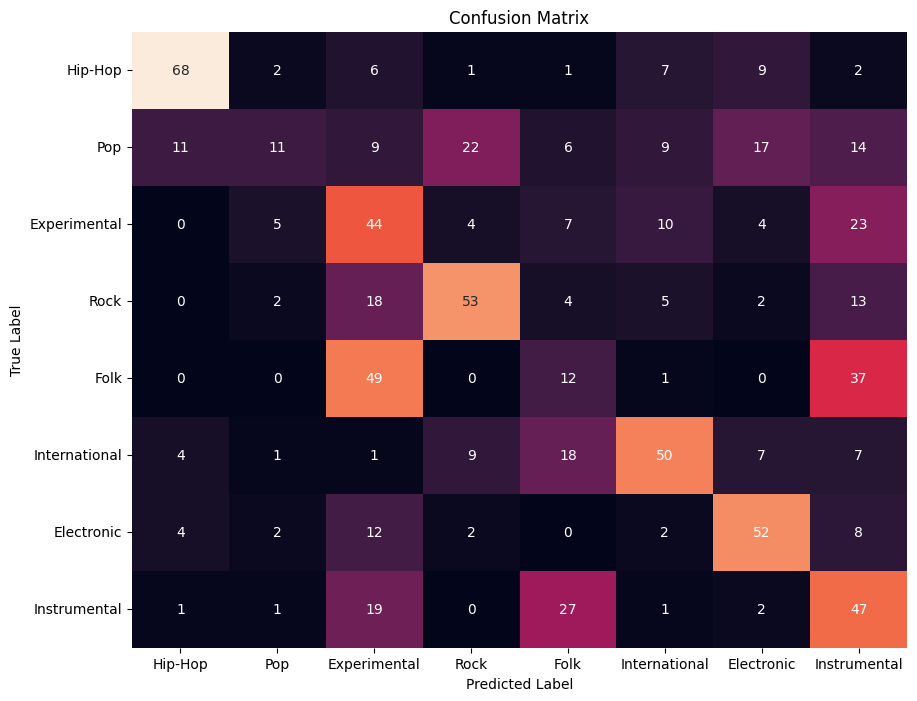

In [29]:
# # # Confusion matrix

# from sklearn.metrics import classification_report

# #y_true = y_test

# y_true = np.argmax(y_test, axis=1) 

# print('true ', y_true)

# y_pred = model.predict(x_test) 
# y_pred = np.argmax(y_pred, axis=1)
# print('prediction ', y_pred)

# #dict_genres.keys()

# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# mat = confusion_matrix(y_true, y_pred)
# sns.heatmap(mat.T, annot=True, fmt='d', cbar=False,
#             xticklabels=dict_genres_final.keys(),
#             yticklabels=dict_genres_final.keys())
# plt.xlabel('true label')
# plt.ylabel('predicted label')
# nombre = "Confusion_Matrix_"+Model_Name+"_LSTM64_"+str(EPOCHS_CNN)+"epochs.jpg"
# plt.savefig(nombre)
# plt.show()

# # Assuming the model is already trained and loaded


from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = []
y_pred = []

for track_id in tqdm(df_test.index, desc='Processing test tracks'):
    genre = df_test[('track', 'genre_top')].loc[track_id]
    y_true_label = dict_genres_final.get(genre)
    y_true.append(y_true_label)

    # Get overlapping segments
    segments = get_overlapping_segments(track_id, segment_duration=SEGMENT_DURATION, overlap_ratio=0.5)

    if not segments:
        print(f"No segments generated for track {track_id}")
        continue

    # Convert segments to numpy array and add channel dimension
    X_segments = np.array(segments)
    X_segments = X_segments.reshape(-1, TIME_FRAMES, N_MELS, 1)

    # Predict probabilities for each segment
    y_probs = model.predict(X_segments, batch_size=BATCH_SIZE)

    # Average the probabilities across all segments
    avg_probs = np.mean(y_probs, axis=0)

    # Determine the predicted genre
    y_pred_label = np.argmax(avg_probs)
    y_pred.append(y_pred_label)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

# Generate classification report
target_names = list(dict_genres_final.keys())
report = classification_report(y_true, y_pred, target_names=target_names , zero_division=0)
print(report)

# Plot confusion matrix
mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True, fmt='d', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



## CRNN - Convolutional Recurrent Neural Network

CRNN - Convolutional Recurrent Neural Network
Sequential model that combines a first convolutional part CNN and the final recurrent part RNN, with LSTM


https://arxiv.org/pdf/1712.08370.pdf


In [30]:
# Open the preprocessed dataset

base_path = "C:/Users/HASSAN/Desktop"
x_train_path = os.path.join(base_path, 'x_train_medium.dat')
y_train_path = os.path.join(base_path, 'y_train_medium.dat')
x_valid_path = os.path.join(base_path, 'x_valid_medium.dat')
y_valid_path = os.path.join(base_path, 'y_valid_medium.dat')
x_test_path = os.path.join(base_path, 'x_test_medium.dat')
y_test_path = os.path.join(base_path, 'y_test_medium.dat')

x_train = np.memmap(x_train_path, dtype='float32', mode='r', shape=(len(df_train), LONG_SPECTO, BINS))  
y_train = np.memmap(y_train_path, dtype='float32', mode='r', shape=(len(df_train), CANT_genres))  

x_valid = np.memmap(x_valid_path, dtype='float32', mode='r', shape=(len(df_valid), LONG_SPECTO, BINS))  
y_valid = np.memmap(y_valid_path, dtype='float32', mode='r', shape=(len(df_valid), CANT_genres))  

x_test = np.memmap(x_test_path, dtype='float32', mode='r', shape=(len(df_test), LONG_SPECTO, BINS))
y_test = np.memmap(y_test_path, dtype='float32', mode='r', shape=(len(df_test), CANT_genres))

#parallelism limited by virtual memory

NameError: name 'LONG_SPECTO' is not defined

In [ ]:
import functools

top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'

BATCH_SIZE = 16
Model_Name = "CRNN_medium"
EPOCHS_CRNN = 50

In [ ]:
from keras.layers import Input
from keras import *
keras.backend.clear_session()

i = Input(shape=(LONG_SPECTO,BINS,))


c1 = Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.001))(i) 
b1 = BatchNormalization(momentum=0.9)(c1) 
p1 = MaxPooling1D(2)(b1)
d1 = Dropout(0.1)(p1) 


c2 = Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.001))(d1) 
b2 = BatchNormalization(momentum=0.9)(c2)
p2 = MaxPooling1D(2)(b2)
d2 = Dropout(0.1)(p2)


c3 = Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.001))(d2) 
b3 = BatchNormalization(momentum=0.9)(c3)
p3 = MaxPooling1D(2)(b3)
d3 = Dropout(0.1)(p3)


# Fase recurrente
lstm = LSTM(64, return_sequences=False)(d3) 
d4 = Dropout(0.1)(lstm)
    
d = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(d4)
d5 = Dropout(0.1)(d)
    

out = Dense(CANT_genres, activation='softmax')(d5)

model = Model(inputs=i, outputs=out)    

model.summary()

In [ ]:
from keras.optimizers import Adam
from keras import *
from keras.callbacks import ReduceLROnPlateau
opt = Adam(lr=0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy',top3_acc])
    
model.summary()


checkpoint_callback = ModelCheckpoint('./best_weight_'+Model_Name+'_LSTM64_'+str(EPOCHS_CRNN)+'epochs.h5', monitor='val_accuracy', verbose=1,
                                          save_best_only=True, mode='max')
    
reducelr_callback = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01)

callbacks = [checkpoint_callback, reducelr_callback]


h = model.fit(x_train, y_train, batch_size=BATCH_SIZE, 
              epochs=EPOCHS_CRNN, verbose=1, validation_data=(x_valid,y_valid), 
              shuffle=True,
              callbacks=callbacks)



In [ ]:

model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)


#### RESULTS FOR THE 8 most representative genres ####


# LSTM(32)  -> good initial results
    # loss=0.969, acc=0.703, top3=0.921   in 25 epochs with callbacks
    # loss=0.652, acc=0.813, top3=0.946   in 50 epochs with callbacks
    
    
#LSTM(64)  
    # loss=0.693, acc=0.813, top3=0.943   at 25 epochs without callbacks?
    # loss=0.621, acc=0.839, top3=0.956   at 50 epochs with callbacks
    # loss=0.661, acc=0.825, top3=0.950   at 75 epochs with
    # loss=0.923, acc=0.738, top3=0.934   at 100 epochs with 

    

In [ ]:
# Summarize history for accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(Model_Name+'_LSTM64_acc-val_acc_'+str(EPOCHS_CRNN)+'epochs.jpg')
plt.show()

# Summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(Model_Name+'_LSTM64_loss-val_loss_'+str(EPOCHS_CRNN)+'epochs.jpg')

plt.show()
      

In [ ]:
from keras.models import load_model
import functools

top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'


In [ ]:
from keras.utils import plot_model

#plot_model(model, to_file=Model_Name+'_LSTM64_'+str(EPOCHS_CRNN)+'epochs_model.png', show_shapes=True)
plot_model(model, to_file=Model_Name+'_LSTM64_'+str(EPOCHS_CRNN)+'epochs_model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False,  dpi=96)

In [ ]:
import visualkeras

#visualkeras.layered_view(model)
#visualkeras.layered_view(model, to_file='prueba.png').show() # write and show

In [ ]:
# Confusion matrix

from sklearn.metrics import classification_report

#y_true = y_test

y_true = np.argmax(y_test, axis=1) 

print('true ', y_true)

y_pred = model.predict(x_test) 
y_pred = np.argmax(y_pred, axis=1)
print('prediction ', y_pred)

#dict_genres.keys()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False,
            xticklabels=dict_genres_final.keys(),
            yticklabels=dict_genres_final.keys())
plt.xlabel('true label')
plt.ylabel('predicted label')
nombre = "Confusion_Matrix_"+Model_Name+"_LSTM64_"+str(EPOCHS_CRNN)+"epochs.jpg"
plt.savefig(nombre)

In [ ]:
model.save(Model_Name+'_LSTM64_'+str(EPOCHS_CRNN)+'epochs.h5') 


We can see that the individual precision of genre is good, approximately .82. This is reflected in genres such as electronica, hip-hop and rock, and to a lower level in classical

The error of 0.6 is high, since it almost always confuses genres such as jazz, pop and blues. But you can see that the error decreases as you train.

For this reason, if it is possible to identify the most characteristic genres, this model has the most projection.

### Test CRNN

In [ ]:
import functools
from keras.models import load_model

In [ ]:
top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'


##Testing the trained model
model = load_model(Model_Name+'_LSTM64_'+str(EPOCHS_CRNN)+'epochs.h5', custom_objects={'top3_acc': top3_acc})


In [ ]:
## testing with a rap (hip-hop) Song
import yt_dlp as youtube_dl
input_url = "https://www.youtube.com/watch?v=VC4ORS5n9Hg&ab_channel=NasVEVO" #hip-hop


video_info = youtube_dl.YoutubeDL().extract_info(url=input_url, download=False)
video_title = video_info['title']

options = {
    'format': 'bestaudio/best',
    'outtmpl': r'C:\Users\HASSAN\Desktop\Master Thesis\ClasificacionGeneroMusical_DL-master\ClasificacionGeneroMusical_DL-master\%(title)s.%(ext)s',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192'
    }]
}


with youtube_dl.YoutubeDL(options) as ydl:
    ydl.download([input_url])

In [ ]:
# GOOD!

# now you have to use the .mp3

# you have to cut it, and take the first sample of 30s

# then use that numpy vector and predict gender


In [ ]:
filepath='C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/Nas.mp3'

##with LIBROSA

y, sr = librosa.load(filepath, duration=30)
        
spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
spect = librosa.power_to_db(spect, ref=np.max)


plt.figure(figsize=(10, 4))
librosa.display.specshow(spect.T, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.show()



In [ ]:
spect

import IPython.display as ipd
ipd.Audio('C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/Nirvana.mp3')
Song = ipd.Audio(y,rate=sr) 

In [ ]:


print("Format x_test ",x_test.shape)
print("Format Prediction song ",spect.T.shape)


In [ ]:
normalized_max_prediction = spect.T[:LONG_SPECTO,:]

normalized_max_prediction.shape


In [ ]:
pred = normalized_max_prediction.reshape(1, LONG_SPECTO, BINS)
y_pred = model.predict(pred)
y_pred

In [ ]:
genre_pred = np.argmax(y_pred, axis=1)
indice = genre_pred[0]
print('Prediction index ', indice)

genre_pred = dict_genres_final.keys()

print("General Prediction: ",list(genre_pred)[indice])

# CNN-RNN in parallel with GRU


Lin Feng, Shenlan Liu, Jianing Yao

https://arxiv.org/pdf/1712.08370.pdf

In [ ]:
from keras import backend as K
from keras import regularizers
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau

BATCH_SIZE=16
EPOCHS_CNN_RNN=50
MODEL_NAME_CNN_RNN="CNN_RNN_medium"

In [ ]:
#reshape it to 3D
base_path = "C:/Users/HASSAN/Desktop"
x_train_path = os.path.join(base_path, 'x_train_medium.dat')
y_train_path = os.path.join(base_path, 'y_train_medium.dat')
x_valid_path = os.path.join(base_path, 'x_valid_medium.dat')
y_valid_path = os.path.join(base_path, 'y_valid_medium.dat')
x_test_path = os.path.join(base_path, 'x_test_medium.dat')
y_test_path = os.path.join(base_path, 'y_test_medium.dat')
x_train_3D = np.memmap(x_train_path, dtype='float32', mode='r', shape=(len(df_train), LONG_SPECTO, BINS, 1))  

x_valid_3D = np.memmap(x_valid_path, dtype='float32', mode='r', shape=(len(df_valid), LONG_SPECTO, BINS, 1))  

x_test_3D = np.memmap(x_test_path, dtype='float32', mode='r', shape=(len(df_test), LONG_SPECTO, BINS, 1))  


In [ ]:
keras.backend.clear_session()

i = Input(shape=(LONG_SPECTO,BINS,1))


# Convolutional Block

c1 = Conv2D(16, kernel_size=(3,1), strides=1, padding='valid', activation='relu')(i) #original 16
p1 = MaxPooling2D((2,2), strides=(2,2))(c1)

c2 = Conv2D(32, kernel_size=(3,1), strides=1, padding='valid', activation='relu')(p1) #32
p2 = MaxPooling2D((2,2), strides=(2,2))(c2) 

c3 = Conv2D(64, kernel_size=(3,1), strides=1, padding='valid', activation='relu')(p2) #64
p3 = MaxPooling2D((2,2), strides=(2,2))(c3)

c4 = Conv2D(128, kernel_size=(3,1), strides=1, padding='valid', activation='relu')(p3) #128
p4 = MaxPooling2D((4,4), strides=(4,4))(c4) 

c5 = Conv2D(64, kernel_size=(3,1), strides=1, padding='valid', activation='relu')(p4) #64
p5 = MaxPooling2D((4,4), strides=(4,4))(c5)


f = Flatten()(p5) # this should output (256)


#Recurrenct Block - Bidirectional GRU 

pool_LSTM = MaxPooling2D(1,2)(i) 

squeezed = Lambda(lambda x: K.squeeze(x, axis=-1))(pool_LSTM) #embedding

lstm = Bidirectional(GRU(32))(squeezed) #It should be 128 to generate 256v output


#Concat output
concat = concatenate([f,lstm], axis=-1) 

d = Dense(128, activation='relu')(concat)#, kernel_regularizer=regularizers.l2(0.01))(concat)
#dr = Dropout(0.3)(d) 

out = Dense(CANT_genres, activation='softmax')(d) 


model = Model(outputs=out,inputs=i)

model.summary()


In [ ]:
import functools

top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'




model.compile(loss='categorical_crossentropy', 
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy',top3_acc]) 



checkpoint_callback = ModelCheckpoint('./best_weight_'+MODEL_NAME_CNN_RNN+'_GRU32_'+str(EPOCHS_CNN_RNN)+'epochs.h5', monitor='val_accuracy', verbose=1,
                                          save_best_only=True, mode='max')
    
reducelr_callback = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01)

callbacks = [checkpoint_callback, reducelr_callback]



h = model.fit(x_train_3D, y_train, batch_size=BATCH_SIZE, 
              epochs=EPOCHS_CNN_RNN, verbose=1, validation_data=(x_valid_3D,y_valid), 
              shuffle=True,  callbacks=callbacks)



### Results CNN-RNN

In [ ]:

model.evaluate(x_test_3D, y_test)


In [ ]:
# Results
        
    
# GRU(32) => 
    # loss=0.710, acc=0.795, top3=0.944 in 20 epochs  
    # loss=0.971, acc=0.705, top3=0.922 in 50 epochs  
    # loss=1.380, acc=0.817, top3=0.951 in 100 epochs 
    

In [ ]:
print(h.history.keys())

# Summarize history for accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
nombre_acc = MODEL_NAME_CNN_RNN+"_acc-val_acc_"+str(EPOCHS_CNN_RNN)+"epochs.jpg"
plt.savefig(nombre_acc)
#plt.savefig('CNN-RNN_medium_loss-val_loss_20epochs.jpg')
plt.show()

# Summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
nombre_loss = MODEL_NAME_CNN_RNN+"_loss-val_loss_"+str(EPOCHS_CNN_RNN)+"epochs.jpg"
plt.savefig(nombre_loss)
plt.show()


In [ ]:
predicciones = model.predict(x_test_3D, batch_size=BATCH_SIZE)


In [ ]:

np.argmax(predicciones[:10,:], axis=1)   #tail


In [ ]:
#df_test.head()
df_test.head()

In [ ]:
import functools
top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'

#model = load_model('genreRecognition.h5', custom_objects={'top3_acc': top3_acc})

In [ ]:

from sklearn.metrics import classification_report

y_true = np.argmax(y_test, axis=1)

#print('y true ', y_true)

y_pred = model.predict(x_test_3D) 
y_pred_3D = np.argmax(y_pred, axis=1)
#print('y prediccion ', y_pred_3D)

#dict_genres.keys()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


mat = confusion_matrix(y_true, y_pred_3D)
sns.heatmap(mat.T , annot=True, fmt='d', cbar=False,
            xticklabels=dict_genres_final.keys(),
            yticklabels=dict_genres_final.keys())
plt.xlabel('true label')
plt.ylabel('predicted label')
mat_name = "confusion_matrix_"+MODEL_NAME_CNN_RNN+"_"+str(EPOCHS_CNN_RNN)+"epochs.jpg"
plt.savefig(mat_name)

In [ ]:
model.save(MODEL_NAME_CNN_RNN+"_"+str(EPOCHS_CNN_RNN)+"epochs.h5")

CNN-RNN CONCLUSION

The best results are presented by the GRU layer (32)

The precision is good, 0.82?? The problem is the loss, which is too high, 0.6

That would mean that there are similar genera at the spectrogram level but with different classification.

We can see that it classifies rock, hip-hop and electronica well, but not pop. The algorithm associates blues, folk and pop with rock; or also pop, folk and hip-hop in electronica.

For this reason it was decided to use the top3 metric.

### Test CNN-RNN

In [ ]:
import functools
from keras.models import load_model

In [ ]:
top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'


##testing the trained model
model_CNN_RNN = load_model(MODEL_NAME_CNN_RNN+"_"+str(EPOCHS_CNN_RNN)+"epochs.h5", custom_objects={'top3_acc': top3_acc})


In [ ]:
## testing with a rap (hip-hop) Song
import yt_dlp as youtube_dl
input_url = "https://www.youtube.com/watch?v=VC4ORS5n9Hg&ab_channel=NasVEVO" #hip-hop


video_info = youtube_dl.YoutubeDL().extract_info(url=input_url, download=False)
video_title = video_info['title']

options = {
    'format': 'bestaudio/best',
    'outtmpl': r'C:\Users\HASSAN\Desktop\Master Thesis\ClasificacionGeneroMusical_DL-master\ClasificacionGeneroMusical_DL-master\%(title)s.%(ext)s',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192'
    }]
}


with youtube_dl.YoutubeDL(options) as ydl:
    ydl.download([input_url])

In [ ]:
filepath='C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/Nas.mp3'

## with LIBROSA

y, sr = librosa.load(filepath, duration=30)
        
spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
spect = librosa.power_to_db(spect, ref=np.max)


plt.figure(figsize=(10, 4))
librosa.display.specshow(spect.T, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.show()



In [ ]:
spect

import IPython.display as ipd
#ipd.Audio('C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/Nirvana.mp3')
Song = ipd.Audio(y,rate=sr) #bien

In [ ]:
#it should be hiphop

print("format of x_test ",x_test.shape)
print("format of Ostro ",spect.T.shape)


In [ ]:
normalized_max_prediction = spect.T[:LONG_SPECTO,:]

normalized_max_prediction.shape


In [ ]:
pred = normalized_max_prediction.reshape(1, LONG_SPECTO, BINS, 1)

y_pred = model.predict(pred)
y_pred

In [ ]:
genre_pred = np.argmax(y_pred, axis=1)
indice = genre_pred[0]
print('prediction index ', indice)

genre_pred = dict_genres_final.keys()
#print("genral prediction: ",dict_genres_final.get(indice))
print("General Prediction: ",list(genre_pred)[indice])

# Conclusions

Conclusions
Regarding the processing of the dataset, Generator as memory-mapped files is much faster than a traditional generator.

The reason is that memory-mapped files work with memory virtualization, and entrust all the parallelism work to RAM.

Instead, a traditional generator consumes batches of data and allocates them space in RAM. In this assigned space it places and removes processing blocks (BATCHES) concurrently. Sequentially It is slower, but more "safe", in the sense that it does not saturate your RAM. In parallel, we must make a generator that processes the data in 4 threads

On the models side, the CRNN sequential model is the one that has the best results, since it is faster and presents an increasing trend in precision; On the side of the parallel CNN-RNN model, it is more useful for fast training, but processing is slower and stagnates at 80 epochs, after which the loss begins to grow.
